### <font color = purple> Анализ "Mobile Price Classification"

**Выполнила:** студентка группы ММР211, Галайда Александра Андреевна </font>

Массив данных был взят с https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

Данный датасет **содержит** набор характеристик мобильных телефонов и их ценовую категорию. 
<br>**Целью исследования** является анализ разброса технических характеристик, а также соотношение цены и возможностей гаджетов.
<br>Анализ **позволит доказать или опровергнуть гипотезу**, что технические характеристики определяют стоимость телфона. 
</font>

<font color = green> Переменные </font>

<br>***battery_power*** - количество энергии, которое может быть накоплено за один заряд, измеряется в мАч;
<br>***blue*** - наличие Bluetooth;
<br>***clock-speed*** - скорость, с которой микропроцессор выполняет команды;
<br>***dual_sim*** - возможность использования двух сим-карт;
<br>***fc*** - разрешение фронтальной камеры, измеряется в Мп; 
<br>***four_g*** - наличие 4G;
<br>***int_memory*** - внутренняя память, измеряется в Гб;
<br>***m_dep*** - толщина телефона, измеряется в См;
<br>***mobile_wt*** - вес телефона, измеряется в Гр;
<br>***n_cores*** - количество ядер в процессоре;
<br>***pc*** - разрешение задней камеры, измеряется в Мп;
<br>***px_height*** - высота телефона, измеряется в См;
<br>***px_width*** - ширина телефона, измеряется в См;
<br>***ram*** - размер оперативной памяти, измеряется в Мб;
<br>***sc_h*** - высота экрана телефона, измеряется в См;
<br>***sc_w*** - ширина экрана телефона, измеряется в См;
<br>***talk_time*** - время беспрерывной работы телефона на одном заряде батареи, измеряется в часах;
<br>***three_g*** - наличие 3G;
<br>***touch_screeт*** - наличие сенсорного экрана;
<br>***wifi*** - наличие функции подключения к WiFi;
<br>***price_range*** - ценовая категория телефона, где 0 - это низкая стоимость, 1 - это средняя стоимость, 2 - стоимость выше среднего, 3 - высокая стоимость.
</font>

### <font color = purple>Создание дата фрейма

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.special as sps
import scipy as sp
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
import statsmodels.api as sm
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree
# загрузка необходимых словарей

import warnings 
warnings.filterwarnings('ignore') 
# функция игнорирования предупреждений

mobile_df = pd.read_csv('DataSet/Mobile Price Classification.csv') #загрузка датасета
mobile_df.head() # вывод 5 первых строк датасета

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### <font color = purple> Создание переменных

**На данном этапе было принято решение привести массив данных в user-friendly вид и подготовить к работе:**
<br>Удалить столбцы, которые дублируются; 
<br>Переименовать столбцы; 
<br>Исследовать на наличие пропущенных значений; 
<br>Перевести часть данных в бинарный вид.

</font>

In [2]:
mobile_df.columns # вывод названия столбцов

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [3]:
mobile = mobile_df.drop(columns = ['px_height', 'px_width']) 
# Данные удалены, так как дублируют колонки "Толщина / См", "Высота / Cм".

In [4]:
mobile_col =['Мощность аккумулятора / мАч','Bluetooth', 'Скорость процессора', 'Две сим-карты',
             'Разрешение фронтальной камеры / Мп', '4G подключение', 'Внутренняя память / Гб', 'Толщина / См', 
             'Вес / Гр', 'Кол-во ядер в процессоре', 'Разрешение задней камеры / Мп', 'Оперативная память / Мб', 
             'Высота / Cм', 'Ширина / Cм', 'Время беспрерывной работы / Ч', '3G подключение', 
             'Сенсорный экран', 'Wi-Fi', 'Ценовая категория'] 

mobile.columns = mobile_col
mobile[:1] 

# переименование столбцов для упрощения чтения данных

,Мощность аккумулятора / мАч,Bluetooth,Скорость процессора,Две сим-карты,Разрешение фронтальной камеры / Мп,4G подключение,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,Разрешение задней камеры / Мп,Оперативная память / Мб,Высота / Cм,Ширина / Cм,Время беспрерывной работы / Ч,3G подключение,Сенсорный экран,Wi-Fi,Ценовая категория
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,9,7,19,0,0,1,1


In [5]:
mobile.info() # вывод информации о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Мощность аккумулятора / мАч         2000 non-null   int64  
 1   Bluetooth                           2000 non-null   int64  
 2   Скорость процессора                 2000 non-null   float64
 3   Две сим-карты                       2000 non-null   int64  
 4   Разрешение фронтальной камеры / Мп  2000 non-null   int64  
 5   4G подключение                      2000 non-null   int64  
 6   Внутренняя память / Гб              2000 non-null   int64  
 7   Толщина / См                        2000 non-null   float64
 8   Вес / Гр                            2000 non-null   int64  
 9   Кол-во ядер в процессоре            2000 non-null   int64  
 10  Разрешение задней камеры / Мп       2000 non-null   int64  
 11  Оперативная память / Мб             2000 no

<AxesSubplot:>

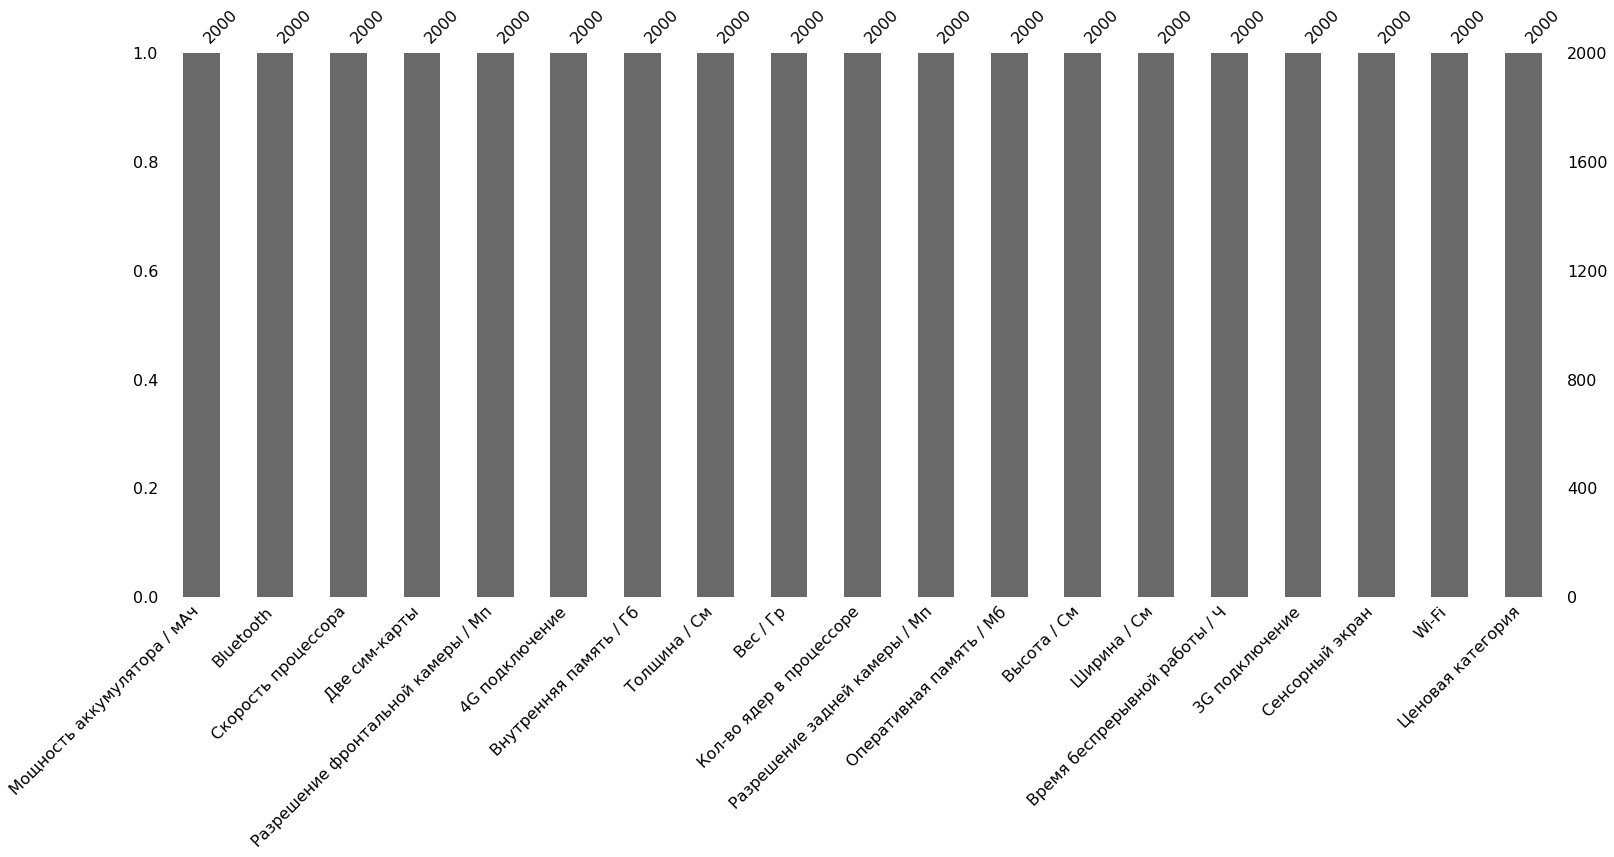

In [6]:
msno.bar(mobile) 
# Пропущенные значения отсутствуют.

In [7]:
mobile['Bluetooth'] = mobile['Bluetooth'] == 1
mobile['Две сим-карты'] = mobile['Две сим-карты'] == 1
mobile['4G подключение'] = mobile['4G подключение'] == 1
mobile['3G подключение'] = mobile['3G подключение'] == 1
mobile['Сенсорный экран'] = mobile['Сенсорный экран'] == 1
mobile['Wi-Fi'] = mobile['Wi-Fi'] == 1
mobile.head() 

# перевод части переменных в бинарный тип

,Мощность аккумулятора / мАч,Bluetooth,Скорость процессора,Две сим-карты,Разрешение фронтальной камеры / Мп,4G подключение,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,Разрешение задней камеры / Мп,Оперативная память / Мб,Высота / Cм,Ширина / Cм,Время беспрерывной работы / Ч,3G подключение,Сенсорный экран,Wi-Fi,Ценовая категория
0,842,False,2.2,False,1,False,7,0.6,188,2,2,2549,9,7,19,False,False,True,1
1,1021,True,0.5,True,0,True,53,0.7,136,3,6,2631,17,3,7,True,True,False,2
2,563,True,0.5,True,2,True,41,0.9,145,5,6,2603,11,2,9,True,True,False,2
3,615,True,2.5,False,0,False,10,0.8,131,6,9,2769,16,8,11,True,False,False,2
4,1821,True,1.2,False,13,True,44,0.6,141,2,14,1411,8,2,15,True,True,False,1


### <font color = purple> Исследование данных

**На данном этапе было проведено первичное сканирование данных.**

</font>

In [8]:
cat_features = []
num_features = []

for column_name in mobile.columns:
    unique_values = len(mobile[column_name].unique())
    if unique_values < 28:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)

print("Numerical features: ", num_features)
print("Categorical features: ", cat_features)
# выделение числовых и категориальных переменных

Numerical features:  ['Мощность аккумулятора / мАч', 'Внутренняя память / Гб', 'Вес / Гр', 'Оперативная память / Мб']
Categorical features:  ['Bluetooth', 'Скорость процессора', 'Две сим-карты', 'Разрешение фронтальной камеры / Мп', '4G подключение', 'Толщина / См', 'Кол-во ядер в процессоре', 'Разрешение задней камеры / Мп', 'Высота / Cм', 'Ширина / Cм', 'Время беспрерывной работы / Ч', '3G подключение', 'Сенсорный экран', 'Wi-Fi', 'Ценовая категория']


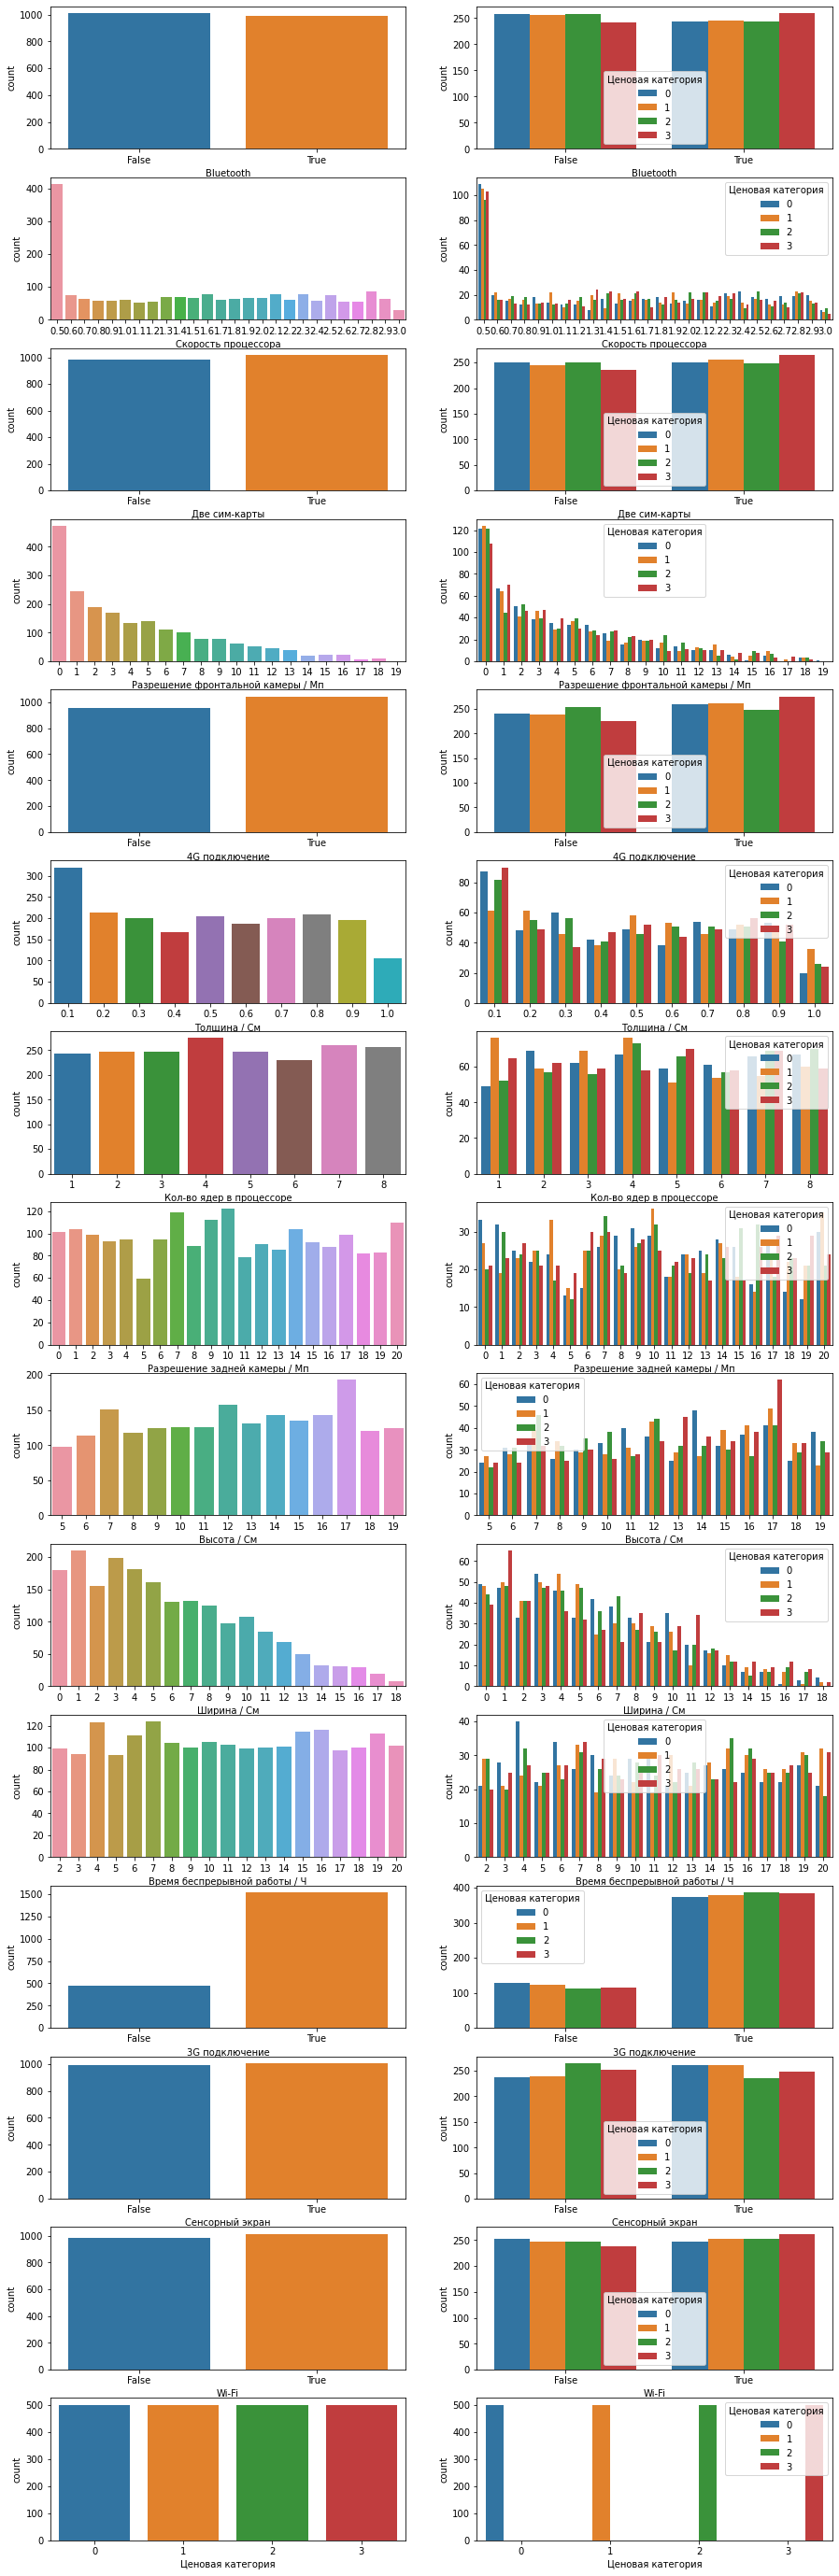

In [9]:
plt.figure(figsize = (15,60))
for idx, feature in enumerate(cat_features):
    plt.subplot(18, 2, idx*2+1)
    sns.countplot(x = feature, data = mobile)
    plt.subplot(18, 2, idx*2+2)
    sns.countplot(x = feature, data = mobile, hue='Ценовая категория')
# визуализация частоты показателей внутри выборки в целом и с разбивкой по уровню ценовой категории

### <font color = purple>Поиск мер центральных тенденций

**На данном этапе были исследованы меры центральной тенденции с целью поиска взаимосвязи ценовой категории и среднего значения, медианы и моды технических характеристик телефонов.**

</font>

In [10]:
mobile.groupby('Ценовая категория')['Мощность аккумулятора / мАч', 'Скорость процессора', 'Разрешение фронтальной камеры / Мп',
        'Внутренняя память / Гб', 'Толщина / См', 'Вес / Гр', 'Кол-во ядер в процессоре', 'Разрешение задней камеры / Мп', 
        'Оперативная память / Мб', 'Высота / Cм', 'Ширина / Cм', 'Время беспрерывной работы / Ч'].mean()

# Среднее значение демонстрирует взаимосвязь "Ценовой категории" и "Мощности аккумулятора", "Расширения задней камеры", 
# "Оперативной памяти". Чем выше цена, тем выше среднее значения вышеперечисленных переменных.

,Мощность аккумулятора / мАч,Скорость процессора,Разрешение фронтальной камеры / Мп,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,Разрешение задней камеры / Мп,Оперативная память / Мб,Высота / Cм,Ширина / Cм,Время беспрерывной работы / Ч
Ценовая категория,,,,,,,,,,,,
0,1116.902,1.5502,4.084,31.174,0.4902,140.552,4.600,9.574,785.314,12.324,5.682,10.612
1,1228.868,1.4886,4.340,32.116,0.5240,140.510,4.298,9.924,1679.490,12.212,5.544,11.362
2,1228.320,1.5298,4.498,30.920,0.4908,143.614,4.682,10.018,2582.816,12.010,5.714,10.972
3,1379.984,1.5204,4.316,33.976,0.5020,136.320,4.502,10.150,3449.232,12.680,6.128,11.098


In [11]:
mobile.groupby('Ценовая категория')['Мощность аккумулятора / мАч', 'Скорость процессора', 'Разрешение фронтальной камеры / Мп',
                'Внутренняя память / Гб', 'Толщина / См', 'Вес / Гр', 'Кол-во ядер в процессоре', 'Разрешение задней камеры / Мп',
                'Оперативная память / Мб', 'Высота / Cм', 'Ширина / Cм', 
                'Время беспрерывной работы / Ч'].median()

# Медиана демонстрирует взаимосвязь "Ценовой категории" и "Мощности аккумулятора", "Скорости процессора", 
# "Разрешения задней камеры", "Оперативной памяти" и "Высоты". Чем выше "Ценовая категория", тем выше медиана. 

,Мощность аккумулятора / мАч,Скорость процессора,Разрешение фронтальной камеры / Мп,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,Разрешение задней камеры / Мп,Оперативная память / Мб,Высота / Cм,Ширина / Cм,Время беспрерывной работы / Ч
Ценовая категория,,,,,,,,,,,,
0,1066.0,1.55,3.0,30.0,0.5,142.0,5.0,9.5,719.5,12.0,5.0,10.0
1,1206.0,1.50,3.0,32.0,0.5,141.0,4.0,10.0,1686.5,12.0,5.0,12.0
2,1219.5,1.50,3.0,30.0,0.5,145.0,5.0,10.0,2577.0,12.0,5.0,11.0
3,1449.5,1.50,3.0,34.5,0.5,134.0,5.0,10.0,3509.5,13.0,5.0,11.0


In [12]:
mobile['Ценовая категория'].value_counts() 

1    500
2    500
3    500
0    500
Name: Ценовая категория, dtype: int64

In [13]:
mobile['Ценовая категория'].mode() 
# Так как значения "Ценовых категорий" представлены в выборках одинаково, по 500 строк,
# модой являются все значения ценовых категорий.

0    0
1    1
2    2
3    3
Name: Ценовая категория, dtype: int64

### <font color = purple> Группировка данных

**На данном этапе была исследована взаимосвязь бинарный переменных с ценовой категорией для этого данные были сгруппированы.** 
**Гипотеза, что наличие функций определяет дороговизну телефона, не была подтверждена.**

</font>

In [14]:
colors = ['#FF6347', '#90EE90']

Text(0.5, 1.0, 'Функция Bluetooth')

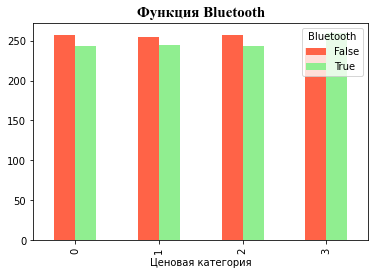

In [15]:
mobile.groupby('Ценовая категория')['Bluetooth'].value_counts().unstack().plot(kind = 'bar', color = colors) 
plt.title('Функция Bluetooth', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# В категории дорогих/3 телефонов, Bluetooth встречается чаще.

Text(0.5, 1.0, 'Возможность использования двух сим-карт')

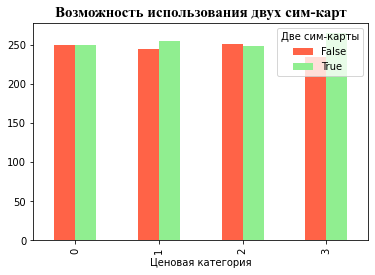

In [16]:
mobile.groupby('Ценовая категория')['Две сим-карты'].value_counts().unstack().plot(kind = 'bar', color = colors) 
plt.title('Возможность использования двух сим-карт', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# В категории дорогих телефонов / 3, возможность использовать 2 сим-карты встречается чаще.

Text(0.5, 1.0, 'Функция 4G подключения')

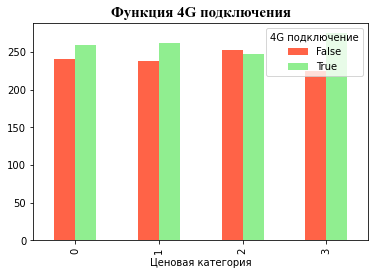

In [17]:
mobile.groupby('Ценовая категория')['4G подключение'].value_counts().unstack().plot(kind = 'bar', color = colors) 
plt.title('Функция 4G подключения', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Функция 4G подключения встречается чаще в высокой ценовой категории / 3.

Text(0.5, 1.0, 'Функция 3G подключения')

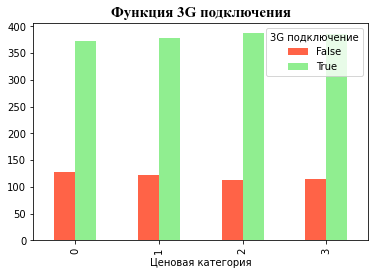

In [18]:
mobile.groupby('Ценовая категория')['3G подключение'].value_counts().unstack().plot(kind = 'bar', color = colors) 
plt.title('Функция 3G подключения', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Наличие 3G подключения не зависит от ценовой категории.

Text(0.5, 1.0, 'Наличие сенсорного экрана')

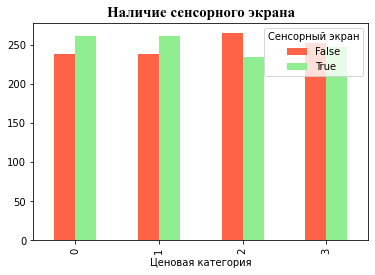

In [19]:
mobile.groupby('Ценовая категория')['Сенсорный экран'].value_counts().unstack().plot(kind = 'bar', color = colors) 
plt.title('Наличие сенсорного экрана', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Сенсорный экран встречается чаще в низкой/0 и средней/1 ценовых категориях.

Text(0.5, 1.0, 'Функция подключения к Wi-Fi')

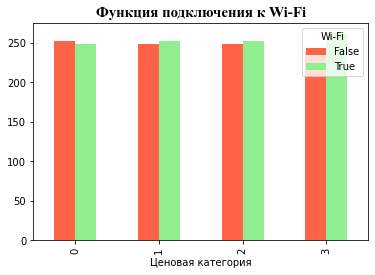

In [20]:
mobile.groupby('Ценовая категория')['Wi-Fi'].value_counts().unstack().plot(kind = 'bar', color = colors) 
plt.title('Функция подключения к Wi-Fi', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Чем выше ценовая категория, тем больше телефонов имеют возможность подключения к Wi-Fi.

## <font color = purple> Фильтрация и группировка данных 

**На данном этапе была исследована взаимосвязь категориальных переменных с ценовой категорией, для этого числовые данных были переведены в категориальный вид и отфильтрованы.**\
**Гипотеза, что наличие функций определяет дороговизну телефона, не была подтверждена.**

</font>

In [21]:
colors = ['#DB7093', '#FFA500', '#90EE90', '#87CEFA']

Text(0.5, 1.0, 'Мощность аккумулятора')

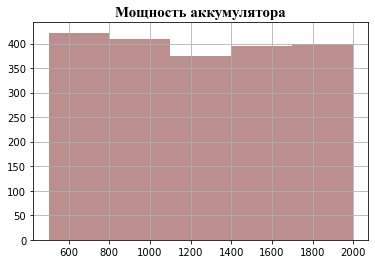

In [22]:
mobile['Мощность аккумулятора / мАч'].hist(bins = 5, color = '#BC8F8F')
plt.title('Мощность аккумулятора', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

In [23]:
def get_power_cat (power):
    if power <=800:
        return '1_Низкая'
    elif power <=1100:
        return '2_Средняя'
    elif power <= 1400:
        return '3_Выше среднего'
    elif power <= 2000:
        return '4_Высокая'
    else:
        return power
    # присвоение категорий на основании гистограммы

In [24]:
mobile['Мощность_аккумулятора_cat'] = mobile['Мощность аккумулятора / мАч'].apply(get_power_cat) # добавление колонки

Text(0.5, 1.0, 'Мощность аккумулятора')

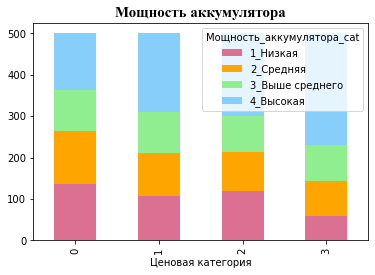

In [25]:
mobile_power = mobile.groupby('Ценовая категория')['Мощность_аккумулятора_cat'].value_counts().unstack().plot(kind='bar', stacked=True, 
                                                                                               color = colors)
plt.title('Мощность аккумулятора', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Чем выше ценовая категория телефона, тем чаще встречаются высокие значения "Мощности аккумулятора".

Text(0.5, 1.0, 'Скорость процессора')

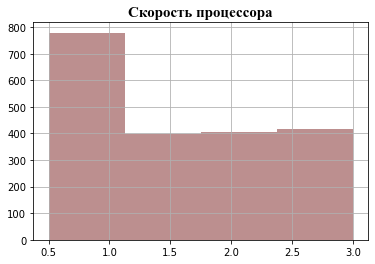

In [26]:
mobile['Скорость процессора'].hist(bins = 4, color = '#BC8F8F')
plt.title('Скорость процессора', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

In [27]:
def get_speed_cat (speed):
    if speed <=1.1:
        return '4_Высокая'
    elif speed <=1.75:
        return '3_Выше среднего'
    elif speed <= 2.4:
        return '2_Средняя'
    elif speed <= 3.0:
        return '1_Низкая'
    else:
        return speed
    # присвоение категорий на основании гистограммы

In [28]:
mobile['Скорость_процессора_cat'] = mobile['Скорость процессора'].apply(get_speed_cat) # добавление колонки

Text(0.5, 1.0, 'Скорость процессора')

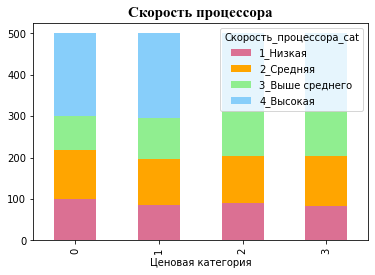

In [29]:
mobile.groupby('Ценовая категория')['Скорость_процессора_cat'].value_counts().unstack().plot(kind='bar', 
                                                                                             stacked=True, color = colors)
plt.title('Скорость процессора', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Высокие значения "Скорости процессора" чаще встречаются в ценовой категории 1.

Text(0.5, 1.0, 'Разрешение фронтальной камеры')

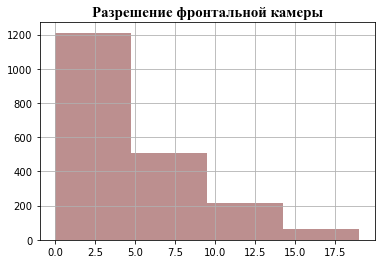

In [30]:
mobile['Разрешение фронтальной камеры / Мп'].hist(bins = 4, color = '#BC8F8F')
plt.title('Разрешение фронтальной камеры', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

In [31]:
def get_resolution_cat (resolution):
    if resolution <=4.8:
        return '1_Низкое'
    elif resolution <=9.0:
        return '2_Среднее'
    elif resolution <= 14.0:
        return '3_Выше среднего'
    elif resolution <= 19.0:
        return '4_Высокое'
    else:
        return resolution
    # присвоение категорий на основании гистограммы

In [32]:
mobile['Разрешение_фронтальной_камеры_cat'] = mobile['Разрешение фронтальной камеры / Мп'].apply(get_resolution_cat) 
# добавление колонки

Text(0.5, 1.0, 'Разрешение фронтальной камеры')

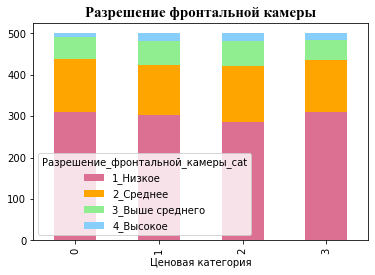

In [33]:
mobile.groupby('Ценовая категория')['Разрешение_фронтальной_камеры_cat'].value_counts().unstack().plot(kind='bar', stacked=True,
                                                                                                      color = colors)
plt.title('Разрешение фронтальной камеры', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Показатели высокий, выше среднего и средний относительного "Разрешения фронтальной камеры" 
# наблюдается чаще у ценовой категории 2.

Text(0.5, 1.0, 'Внутренняя память')

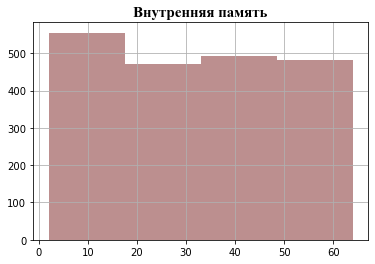

In [34]:
mobile['Внутренняя память / Гб'].hist(bins = 4, color = '#BC8F8F')
plt.title('Внутренняя память', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

In [35]:
def get_memory_cat (memory):
    if memory <= 18:
        return '1_Низкая'
    elif memory <= 33:
        return '2_Средняя'
    elif memory <= 49:
        return '3_Выше средней'
    elif memory <= 64:
        return '4_Высокая'
    else:
        return memory
    # присвоение категорий на основании гистограммы

In [36]:
mobile['Внутренняя_память_cat'] = mobile['Внутренняя память / Гб'].apply(get_memory_cat) 
# добавление колонки

Text(0.5, 1.0, 'Внутренняя память')

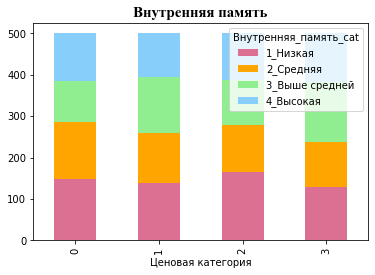

In [37]:
mobile.groupby('Ценовая категория')['Внутренняя_память_cat'].value_counts().unstack().plot(kind='bar', stacked=True,
                                                                                          color = colors)
plt.title('Внутренняя память', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Высокое, выше среднего и среднее "Разрешение фронтальной камеры" наблюдается чаще у ценовой категории 2.

Text(0.5, 1.0, 'Толщина')

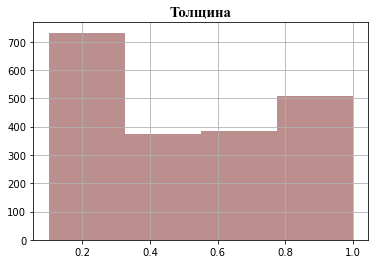

In [38]:
mobile['Толщина / См'].hist(bins = 4, color = '#BC8F8F')
plt.title('Толщина', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

In [39]:
def get_width_cat (width):
    if width <= 0.3:
        return '1_Тонкий'
    elif width <= 0.5:
        return '2_Средний'
    elif width <= 0.7:
        return '3_Толще среднего'
    elif width <= 1.0:
        return '4_Толстый'
    else:
        return width
    # присвоение категорий на основании гистограммы

In [40]:
mobile['Толщина_cat'] = mobile['Толщина / См'].apply(get_width_cat) 
# добавление колонки

Text(0.5, 1.0, 'Толщина')

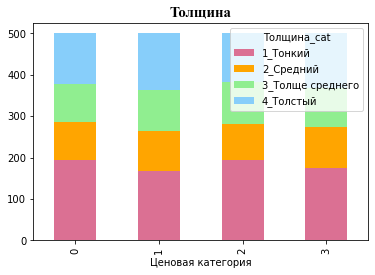

In [41]:
mobile.groupby('Ценовая категория')['Толщина_cat'].value_counts().unstack().plot(kind='bar', stacked=True,
                                                                                color = colors)
plt.title('Толщина', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Тонкие телефоны чаще наблюдаются в ценовой категории 2.

### <font color = purple> Частота распределения

**На данном этапе были исследованы категориальные переменные, а именно частота категорий внутри выборки с целью изучения соотношения продвинутых технологических решений с устаревшими.** 

</font>

In [42]:
mobile.describe(include = object)
# Во всех ценовых категориях чаще всего встречаются телефоны с высокой "Мощностью аккумулятора", высокой "Мощностью процессора", 
# низким "Разрешением фронтальной камеры", низкой "Внутренней памятью" и тонкой "Толщиной".

,Мощность_аккумулятора_cat,Скорость_процессора_cat,Разрешение_фронтальной_камеры_cat,Внутренняя_память_cat,Толщина_cat
count,2000,2000,2000,2000,2000
unique,4,4,4,4,4
top,4_Высокая,4_Высокая,1_Низкое,1_Низкая,1_Тонкий
freq,794,779,1211,583,732


In [43]:
power = mobile.Мощность_аккумулятора_cat.value_counts()[mobile.Мощность_аккумулятора_cat.value_counts(normalize = True)>0.005]

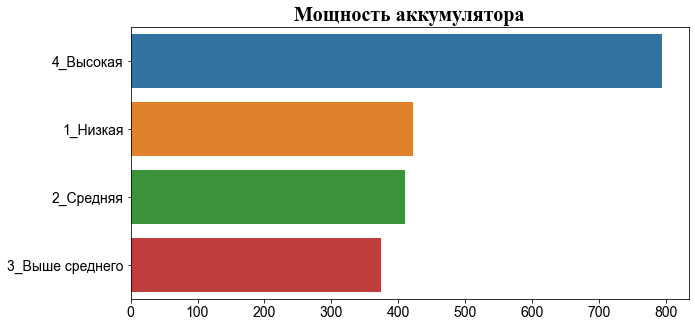

In [44]:
plt.figure(figsize = (10, 5))
plt.title('Мощность аккумулятора', font = 'Times New Roman', fontweight = 'bold', fontsize = 20)
plt.tick_params(labelsize = 14)
sns.barplot(y = power.index, x = power.values, alpha = 1)
sns.set(font = 'Times New Roman')
#Во всех ценовых категориях чаще всего встречаются телефоны с высокой "Мощностью аккумулятора"

In [45]:
speed = mobile.Скорость_процессора_cat.value_counts()[mobile.Скорость_процессора_cat.value_counts(normalize = True)>0.005]

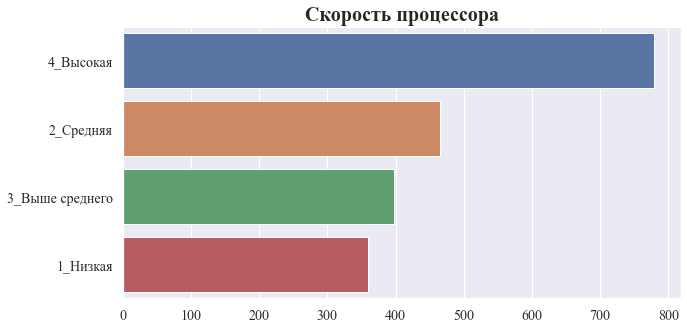

In [46]:
plt.figure(figsize = (10,5))
plt.title('Скорость процессора', font = 'Times New Roman', fontweight = 'bold', fontsize = 20)
plt.tick_params(labelsize = 14)
sns.barplot(y = speed.index, x = speed.values, alpha = 1)
sns.set(font = 'Times New Roman')
# Во всех ценовых категориях чаще всего встречаются телефоны с высокой "Скоростью процессора"

In [47]:
resolution = mobile.Разрешение_фронтальной_камеры_cat.\
value_counts()[mobile.Разрешение_фронтальной_камеры_cat.value_counts(normalize = True)>0.005]

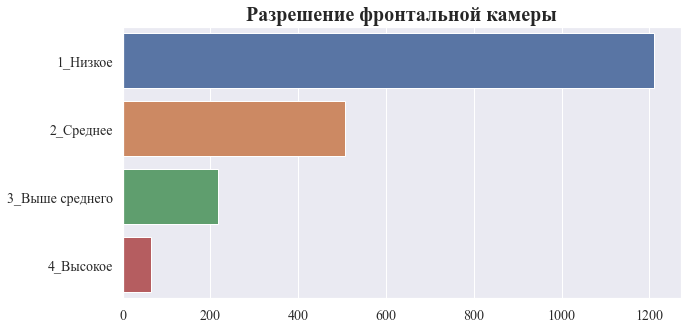

In [48]:
plt.figure(figsize = (10,5))
plt.title('Разрешение фронтальной камеры', font = 'Times New Roman', fontweight = 'bold', fontsize = 20)
plt.tick_params(labelsize = 14)
sns.barplot(y = resolution.index, x = resolution.values, alpha = 1)
sns.set(font = 'Times New Roman')
# Во всех ценовых категориях чаще всего встречаются телефоны с низким "Разрешением фронтальной камеры"

In [49]:
memory = mobile.Внутренняя_память_cat.value_counts()[mobile.Внутренняя_память_cat.value_counts(normalize = True)>0.005]

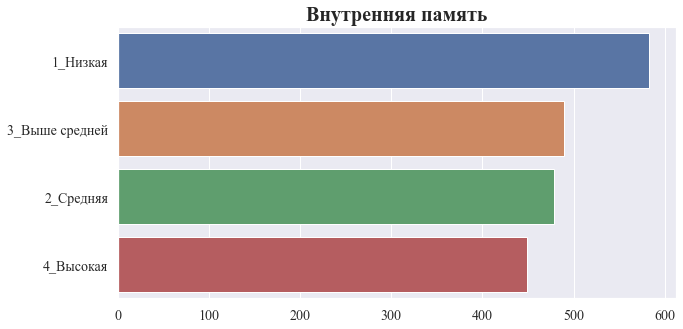

In [50]:
plt.figure(figsize = (10,5))
plt.title('Внутренняя память', font = 'Times New Roman', fontweight = 'bold', fontsize = 20)
plt.tick_params(labelsize = 14)
sns.barplot(y = memory.index, x = memory.values, alpha = 1)
sns.set(font = 'Times New Roman')
# Во всех ценовых категориях чаще всего встречаются телефоны с маленьким размером "Внутренней памяти"

In [51]:
width = mobile.Толщина_cat.value_counts()[mobile.Толщина_cat.value_counts(normalize = True)>0.005]

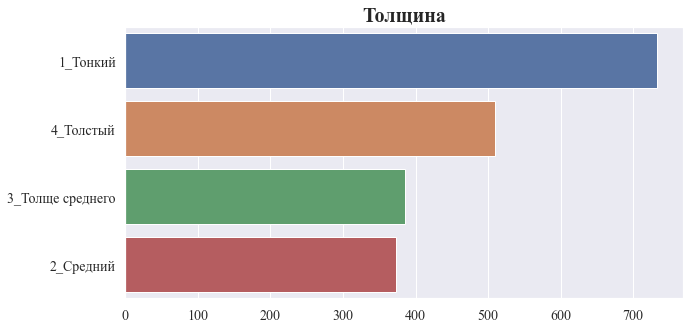

In [52]:
plt.figure(figsize = (10,5))
plt.title('Толщина', font = 'Times New Roman', fontweight = 'bold', fontsize = 20)
plt.tick_params(labelsize = 14)
sns.barplot(y = width.index, x = width.values, alpha = 1)
sns.set(font = 'Times New Roman')
# Во всех ценовых категориях чаще всего встречаются "Тонкие" телефоны

### <font color = purple> Изучение разброса данных, поиск доверительного интервала и выбросов

**Целью данного раздела является изучение разброса технических характеристик, наиболее частых значений и идентификация выбросов для качественного корреляционного анализа**

In [53]:
mobile[:1]

,Мощность аккумулятора / мАч,Bluetooth,Скорость процессора,Две сим-карты,Разрешение фронтальной камеры / Мп,4G подключение,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,...,Время беспрерывной работы / Ч,3G подключение,Сенсорный экран,Wi-Fi,Ценовая категория,Мощность_аккумулятора_cat,Скорость_процессора_cat,Разрешение_фронтальной_камеры_cat,Внутренняя_память_cat,Толщина_cat
0,842,False,2.2,False,1,False,7,0.6,188,2,...,19,False,False,True,1,2_Средняя,2_Средняя,1_Низкое,1_Низкая,3_Толще среднего


In [54]:
mobile_power = mobile['Мощность аккумулятора / мАч'].max() - mobile['Мощность аккумулятора / мАч'].min() # размах 
mobile_power_iqr = np.percentile(mobile['Мощность аккумулятора / мАч'], 75) - np.percentile(mobile['Мощность аккумулятора / мАч'], 25)
# интерквартильный размах
# В данных присутсвтуют аномальные значения, так как размах и интерквартильный размах отличаются приблизительно в 2 раза.

mobile_power_var = mobile['Мощность аккумулятора / мАч'].var() # дисперсия 
mobile_power_std = mobile['Мощность аккумулятора / мАч'].std() # среднеквадратичное отклонение
# следовательно, отклонение значений от среднего находится в диапазоне +-439

display(mobile_power, mobile_power_iqr, mobile_power_var, mobile_power_std)

1497

763.5

193088.35983766866

439.4182060835312

In [55]:
def my_basic_research(df = mobile, column = 'Мощность аккумулятора / мАч'):
    print('Базовые метрики:  ')
    print(df[column].describe())
    print ('-----------------')
    
    print('Самые популярные метрики, топ 5')
    print(df[column].value_counts().nlargest(5))
    print('-----------------')
    
    print('КЭ', kurtosis(df[column]))
    print('КА', skew(df[column]))
    
    sns.displot(df[column])
    plt.title('Распределение метрик')

Базовые метрики:  
count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: Мощность аккумулятора / мАч, dtype: float64
-----------------
Самые популярные метрики, топ 5
1872    6
618     6
1589    6
1715    5
1807    5
Name: Мощность аккумулятора / мАч, dtype: int64
-----------------
КЭ -1.224084165725428
КА 0.03187454295305568


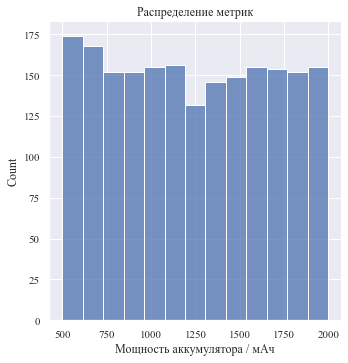

In [56]:
my_basic_research(df = mobile, column = 'Мощность аккумулятора / мАч') 
# В Топ-3 показателя метрики "Мощности аккумлятора" входят 1872, 618, 1589
# Чем выше мощность, тем меньше представленность в выборке.

Text(0.5, 1.0, 'Мощность аккумулятора')

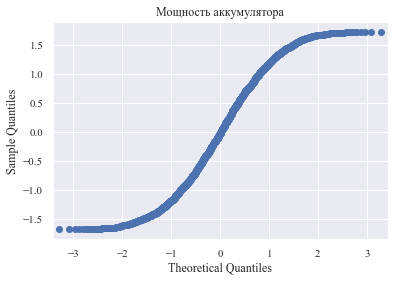

In [57]:
sm.qqplot(mobile['Мощность аккумулятора / мАч'], fit = True)
plt.title('Мощность аккумулятора')

Text(0.5, 1.0, 'Мощность аккумулятора')

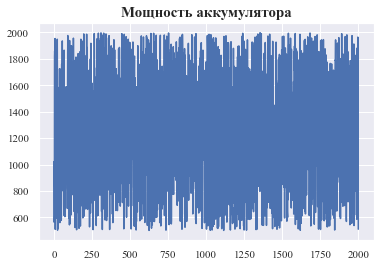

In [58]:
mobile['Мощность аккумулятора / мАч'].plot()
plt.title('Мощность аккумулятора', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

Text(0.5, 1.0, 'Мощность аккумулятора')

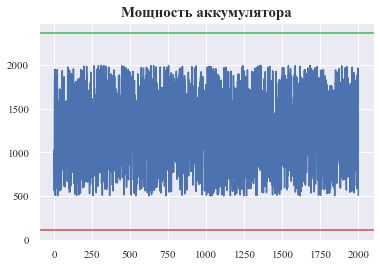

In [59]:
def my_norm_confidence(df = mobile, column = 'Мощность аккумулятора / мАч', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

confidence = my_norm_confidence()

mobile['Мощность аккумулятора / мАч'].plot()
plt.axhline(y = confidence[1], color = 'g', linestyle = '-')
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
plt.title('Мощность аккумулятора', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Доверительный интервал позволяет говорить об отсутствии выбросов.

In [60]:
import scipy.stats

In [61]:
mobile['Z_score'] = scipy.stats.zscore(mobile['Мощность аккумулятора / мАч'])
mobile[(mobile['Z_score'] < -3) | (mobile['Z_score'] > 3)]
# Z-оценка подтверждает отсутствие выбросов.

,Мощность аккумулятора / мАч,Bluetooth,Скорость процессора,Две сим-карты,Разрешение фронтальной камеры / Мп,4G подключение,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,...,3G подключение,Сенсорный экран,Wi-Fi,Ценовая категория,Мощность_аккумулятора_cat,Скорость_процессора_cat,Разрешение_фронтальной_камеры_cat,Внутренняя_память_cat,Толщина_cat,Z_score


In [62]:
mobile_fcam = mobile['Разрешение фронтальной камеры / Мп'].max() - mobile['Разрешение фронтальной камеры / Мп'].min() # размах 
mobile_fcam_iqr = np.percentile(mobile['Разрешение фронтальной камеры / Мп'], 75) - np.percentile(mobile['Разрешение фронтальной камеры / Мп'], 25)
# интерквартильный размах
# В данных возможно присутсвтуют аномальные значения, так как размах и интерквартильный размах отличаются больше, чем в 3,2 раза.

mobile_fcam_var = mobile['Разрешение фронтальной камеры / Мп'].var() # дисперсия 
mobile_fcam_std = mobile['Разрешение фронтальной камеры / Мп'].std() # среднеквадратичное отклонение
# Следовательно, отклонение значений от среднего находится в диапазоне +-4

display(mobile_fcam, mobile_fcam_iqr, mobile_fcam_var, mobile_fcam_std) 

19

6.0

18.84813381690835

4.341443747983884

In [63]:
def my_basic_research(df = mobile, column = 'Разрешение фронтальной камеры / Мп'):
    print('Базовые метрики:  ')
    print(df[column].describe())
    print ('-----------------')
    
    print('Самые популярные метрики, топ 5')
    print(df[column].value_counts().nlargest(5))
    print('-----------------')
    
    print('КЭ', kurtosis(df[column]))
    print('КА', skew(df[column]))
    
    sns.displot(df[column])
    plt.title('Распределение метрик')

In [64]:
def my_norm_confidence(df = mobile, column = 'Разрешение фронтальной камеры / Мп', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

Базовые метрики:  
count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: Разрешение фронтальной камеры / Мп, dtype: float64
-----------------
Самые популярные метрики, топ 5
0    474
1    245
2    189
3    170
5    139
Name: Разрешение фронтальной камеры / Мп, dtype: int64
-----------------
КЭ 0.27338561771466496
КА 1.0190463925723268


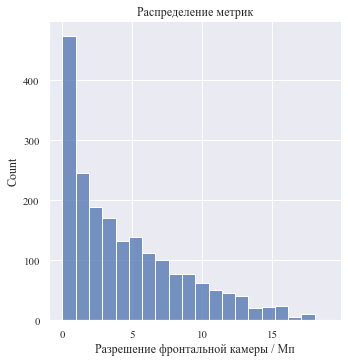

In [65]:
my_basic_research(df = mobile, column = 'Разрешение фронтальной камеры / Мп') 
# В Топ-3 показателя метрики "Разрешения фронтальной камеры" входят 0, 1, 2.
# Чем меньше разрешение фронтальной камеры, тем выше представленность в выборке.

Text(0.5, 1.0, 'Разрешение фронтальной камеры')

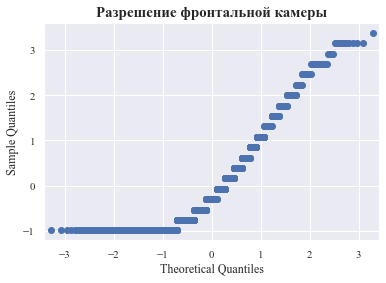

In [66]:
sm.qqplot(mobile['Разрешение фронтальной камеры / Мп'], fit = True)
plt.title('Разрешение фронтальной камеры', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

In [67]:
confidence = my_norm_confidence()

Text(0.5, 1.0, 'Разрешение фронтальной камеры')

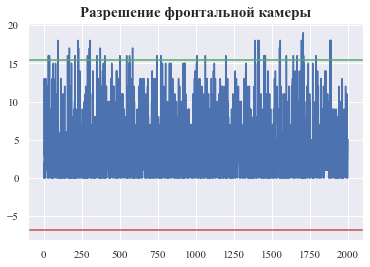

In [68]:
def my_norm_confidence(df = mobile, column = 'Разрешение фронтальной камеры / Мп', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

confidence = my_norm_confidence()

mobile['Разрешение фронтальной камеры / Мп'].plot()
plt.axhline(y = confidence[1], color = 'g', linestyle = '-')
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
plt.title('Разрешение фронтальной камеры', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Доверительный интервал позволяет говорить о наличии выбросов.

In [69]:
mobile['Z_score'] = scipy.stats.zscore(mobile['Разрешение фронтальной камеры / Мп'])
mobile[(mobile['Z_score'] < -3) | (mobile['Z_score'] > 3)]
# Z-оценка позволяет сделать вывод о наличии 12 выбросов.
# При этом выбросы касаются только аномально высоких значений и не зависят от принадлежности той или иной ценовой категории.

,Мощность аккумулятора / мАч,Bluetooth,Скорость процессора,Две сим-карты,Разрешение фронтальной камеры / Мп,4G подключение,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,...,3G подключение,Сенсорный экран,Wi-Fi,Ценовая категория,Мощность_аккумулятора_cat,Скорость_процессора_cat,Разрешение_фронтальной_камеры_cat,Внутренняя_память_cat,Толщина_cat,Z_score
95,1137,True,1.0,False,18,False,7,1.0,196,3,...,True,True,True,3,3_Выше среднего,4_Высокая,4_Высокое,1_Низкая,4_Толстый,3.154233
226,1708,True,2.4,True,18,True,49,0.1,109,1,...,True,True,True,3,4_Высокая,2_Средняя,4_Высокое,3_Выше средней,1_Тонкий,3.154233
305,1348,False,2.0,False,18,False,52,0.3,98,3,...,True,True,True,1,3_Выше среднего,2_Средняя,4_Высокое,4_Высокая,1_Тонкий,3.154233
1387,1533,True,1.1,True,18,True,17,0.3,160,4,...,True,False,True,2,4_Высокая,4_Высокая,4_Высокое,1_Низкая,1_Тонкий,3.154233
1406,1731,True,2.3,True,18,False,60,0.5,171,4,...,False,True,False,1,4_Высокая,2_Средняя,4_Высокое,4_Высокая,2_Средний,3.154233
1416,1448,False,0.5,True,18,False,2,0.2,100,5,...,True,True,True,0,4_Высокая,4_Высокая,4_Высокое,1_Низкая,1_Тонкий,3.154233
1554,1957,False,1.2,True,18,True,36,0.8,151,2,...,True,False,True,1,4_Высокая,3_Выше среднего,4_Высокое,3_Выше средней,4_Толстый,3.154233
1693,695,False,0.5,False,18,True,12,0.6,196,2,...,True,True,True,2,1_Низкая,4_Высокая,4_Высокое,1_Низкая,3_Толще среднего,3.154233
1705,1290,True,1.4,True,19,True,35,0.3,110,4,...,True,False,False,0,3_Выше среднего,3_Выше среднего,4_Высокое,3_Выше средней,1_Тонкий,3.384628
1880,1720,False,1.6,False,18,True,2,0.8,188,5,...,True,False,True,2,4_Высокая,3_Выше среднего,4_Высокое,1_Низкая,4_Толстый,3.154233


In [70]:
mobile.loc[mobile['Z_score'] < -3] = np.nan
mobile.loc[mobile['Z_score'] > 3] = np.nan
# В строках с наличием выбросов было проставлено неизвестное/пропущенное значение.

In [71]:
mobile = mobile.dropna(axis = 0)
# Строки с выбросами в значении "Разрешение фронтальной камеры" были удалены из дата сета с целью построения более 
# достоверной корреляции.

In [72]:
mobile_imem = mobile['Внутренняя память / Гб'].max() - mobile['Внутренняя память / Гб'].min() #размах 
mobile_imem_iqr = np.percentile(mobile['Внутренняя память / Гб'], 75) - np.percentile(mobile['Внутренняя память / Гб'], 25)
# интерквартильный размах
# В данных возиожно присутсвтуют аномальные значения, так как размах и интерквартильный размах отличаются приблизительно в 1,9 раза.

mobile_imem_var = mobile['Внутренняя память / Гб'].var() # дисперсия 
mobile_imem_std = mobile['Внутренняя память / Гб'].std() # среднеквадратичное отклонение
# Следовательно, отклонение значений от среднего находится в диапазоне +-18

display(mobile_imem, mobile_imem_iqr, mobile_imem_var, mobile_imem_std) 

62.0

32.0

328.6307201538367

18.128174760682242

In [73]:
def my_basic_research(df = mobile, column = 'Внутренняя память / Гб'):
    print('Базовые метрики:  ')
    print(df[column].describe())
    print ('-----------------')
    
    print('Самые популярные метрики, топ 5')
    print(df[column].value_counts().nlargest(5))
    print('-----------------')
    
    print('КЭ', kurtosis(df[column]))
    print('КА', skew(df[column]))
    
    sns.displot(df[column])
    plt.title('Распределение метрик')

In [74]:
def my_norm_confidence(df = mobile, column = 'Внутренняя память / Гб', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

Базовые метрики:  
count    1988.000000
mean       32.089034
std        18.128175
min         2.000000
25%        16.000000
50%        32.000000
75%        48.000000
max        64.000000
Name: Внутренняя память / Гб, dtype: float64
-----------------
Самые популярные метрики, топ 5
27.0    47
14.0    45
16.0    44
57.0    42
2.0     40
Name: Внутренняя память / Гб, dtype: int64
-----------------
КЭ -1.2143217391157985
КА 0.05629786041788768


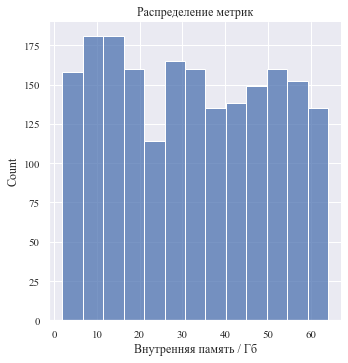

In [75]:
my_basic_research(df = mobile, column = 'Внутренняя память / Гб') 
# В Топ-3 показателя метрики "Внутренней памяти" входят 27, 14, 16.
# Чем меньше размер внутренней памяти, тем выше представленность в выборке.

Text(0.5, 1.0, 'Внутренняя память')

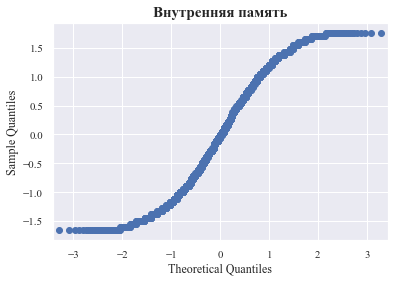

In [76]:
sm.qqplot(mobile['Внутренняя память / Гб'], fit = True)
plt.title('Внутренняя память', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

Text(0.5, 1.0, 'Внутренняя память')

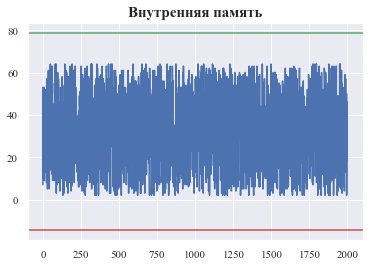

In [77]:
def my_norm_confidence(df = mobile, column = 'Внутренняя память / Гб', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

confidence = my_norm_confidence()

mobile['Внутренняя память / Гб'].plot()
plt.axhline(y = confidence[1], color = 'g', linestyle = '-')
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
plt.title('Внутренняя память', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Доверительный интервал позволяет говорить об отсутствии выбросов.

In [78]:
mobile['Z_score'] = scipy.stats.zscore(mobile['Внутренняя память / Гб'])
mobile[(mobile['Z_score'] < -3) | (mobile['Z_score'] > 3)]
# Z-оценка подтверждает отсутствие выбросов.

,Мощность аккумулятора / мАч,Bluetooth,Скорость процессора,Две сим-карты,Разрешение фронтальной камеры / Мп,4G подключение,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,...,3G подключение,Сенсорный экран,Wi-Fi,Ценовая категория,Мощность_аккумулятора_cat,Скорость_процессора_cat,Разрешение_фронтальной_камеры_cat,Внутренняя_память_cat,Толщина_cat,Z_score


In [79]:
mobile_weight = mobile['Вес / Гр'].max() - mobile['Вес / Гр'].min() # размах 
mobile_weight_iqr = np.percentile(mobile['Вес / Гр'], 75) - np.percentile(mobile['Вес / Гр'], 25)
# интерквартильный размах
# В данных присутсвтуют аномальные значения, так как размах и интерквартильный размах отличаются приблизительно в 2 раза.

mobile_weight_var = mobile['Вес / Гр'].var() # дисперсия 
mobile_weight_std = mobile['Вес / Гр'].std() # среднеквадратичное отклонение
# Следовательно, отклонение значений от среднего находится в диапазоне +-35.

display(mobile_weight, mobile_weight_iqr, mobile_weight_var, mobile_weight_std) 
# В данных возможно присутсвтуют аномальные значения, так как размах и интерквартильный размах отличаются приблизительно в 2 раза.

120.0

61.0

1250.405864224099

35.3610783803902

In [80]:
def my_norm_confidence(df = mobile, column = 'Вес / Гр', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

Базовые метрики:  
count    1988.000000
mean      140.159457
std        35.361078
min        80.000000
25%       109.000000
50%       141.000000
75%       170.000000
max       200.000000
Name: Вес / Гр, dtype: float64
-----------------
Самые популярные метрики, топ 5
182.0    28
101.0    27
185.0    27
146.0    26
199.0    26
Name: Вес / Гр, dtype: int64
-----------------
КЭ -1.2068357101080482
КА 0.007795218866478191


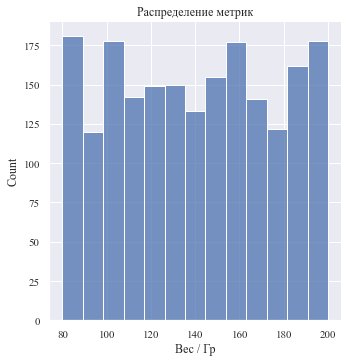

In [81]:
my_basic_research(df = mobile, column = 'Вес / Гр') 
# Вес телефонов, наиболее представленных в выборке, составляет 182, 101, 185, 146 и 199 грамм.

Text(0.5, 1.0, 'Вес')

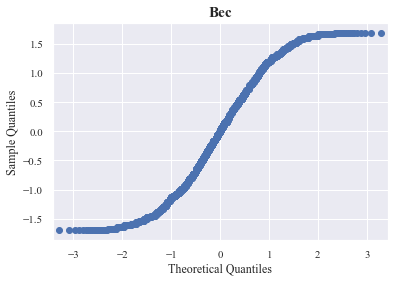

In [82]:
sm.qqplot(mobile['Вес / Гр'], fit = True)
plt.title('Вес', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

Text(0.5, 1.0, 'Вес')

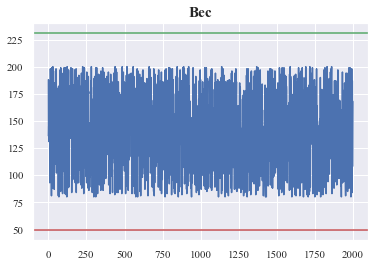

In [83]:
def my_norm_confidence(df = mobile, column = 'Вес / Гр', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

confidence = my_norm_confidence()

mobile['Вес / Гр'].plot()
plt.axhline(y = confidence[1], color = 'g', linestyle = '-')
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
plt.title('Вес', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Доверительный интервал позволяет говорить об отсутствии выбросов.

In [84]:
mobile['Z_score'] = scipy.stats.zscore(mobile['Вес / Гр'])
mobile[(mobile['Z_score'] < -3) | (mobile['Z_score'] > 3)]
# Z-оценка подтверждает отсутствие выбросов.

,Мощность аккумулятора / мАч,Bluetooth,Скорость процессора,Две сим-карты,Разрешение фронтальной камеры / Мп,4G подключение,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,...,3G подключение,Сенсорный экран,Wi-Fi,Ценовая категория,Мощность_аккумулятора_cat,Скорость_процессора_cat,Разрешение_фронтальной_камеры_cat,Внутренняя_память_cat,Толщина_cat,Z_score


In [85]:
mobile_core = mobile['Кол-во ядер в процессоре'].max() - mobile['Кол-во ядер в процессоре'].min() # размах 
mobile_core_iqr = np.percentile(mobile['Кол-во ядер в процессоре'], 75) - np.percentile(mobile['Кол-во ядер в процессоре'], 25)
# интерквартильный размах
# В данных присутсвтуют аномальные значения, так как размах и интерквартильный размах отличаются приблизительно в 1,8 раза.

mobile_core_var = mobile['Кол-во ядер в процессоре'].var() # дисперсия 
mobile_core_std = mobile['Кол-во ядер в процессоре'].std() # среднеквадратичное отклонение
# Следовательно, отклонение значений от среднего находится в диапазоне +-2.

display(mobile_core, mobile_core_iqr, mobile_core_var, mobile_core_std) 

7.0

4.0

5.2440065658166155

2.289979599432409

In [86]:
def my_norm_confidence(df = mobile, column = 'Кол-во ядер в процессоре', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

Базовые метрики:  
count    1988.000000
mean        4.524145
std         2.289980
min         1.000000
25%         3.000000
50%         4.000000
75%         7.000000
max         8.000000
Name: Кол-во ядер в процессоре, dtype: float64
-----------------
Самые популярные метрики, топ 5
4.0    271
7.0    257
8.0    256
2.0    245
3.0    244
Name: Кол-во ядер в процессоре, dtype: int64
-----------------
КЭ -1.2315347361264157
КА 0.0010569979174552373


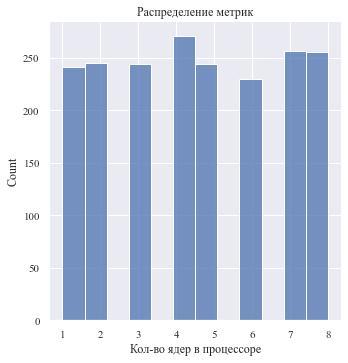

In [87]:
my_basic_research(df = mobile, column = 'Кол-во ядер в процессоре') 
# Кол-во ядер телефонов, наиболее представленных в выборке, составляет 4, 7, 8.

Text(0.5, 1.0, 'Кол-во ядер в процессоре')

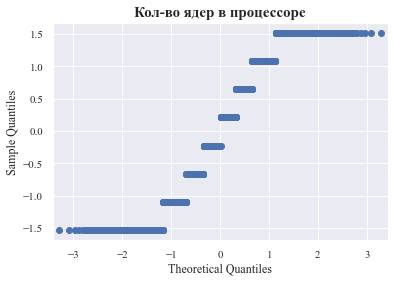

In [88]:
sm.qqplot(mobile['Кол-во ядер в процессоре'], fit = True)
plt.title('Кол-во ядер в процессоре', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

Text(0.5, 1.0, 'Кол-во ядер в процессоре')

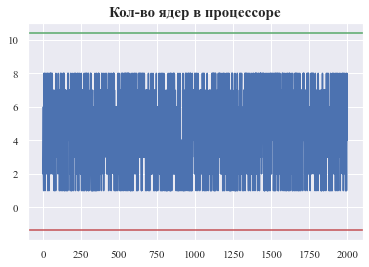

In [89]:
def my_norm_confidence(df = mobile, column = 'Кол-во ядер в процессоре', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

confidence = my_norm_confidence()

mobile['Кол-во ядер в процессоре'].plot()
plt.axhline(y = confidence[1], color = 'g', linestyle = '-')
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
plt.title('Кол-во ядер в процессоре', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Доверительный интервал позволяет говорить об отсутствии выбросов.

In [90]:
mobile['Z_score'] = scipy.stats.zscore(mobile['Кол-во ядер в процессоре'])
mobile[(mobile['Z_score'] < -3) | (mobile['Z_score'] > 3)]
# Z-оценка подтверждает отсутствие выбросов.

,Мощность аккумулятора / мАч,Bluetooth,Скорость процессора,Две сим-карты,Разрешение фронтальной камеры / Мп,4G подключение,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,...,3G подключение,Сенсорный экран,Wi-Fi,Ценовая категория,Мощность_аккумулятора_cat,Скорость_процессора_cat,Разрешение_фронтальной_камеры_cat,Внутренняя_память_cat,Толщина_cat,Z_score


In [91]:
mobile_bcam = mobile['Разрешение задней камеры / Мп'].max() - mobile['Разрешение задней камеры / Мп'].min() # размах 
mobile_bcam_iqr = np.percentile(mobile['Разрешение задней камеры / Мп'], 75) - np.percentile(mobile['Разрешение задней камеры / Мп'], 25)
# интерквартильный размах
# В данных возможно присутсвтуют аномальные значения, так как размах и интерквартильный размах отличаются приблизительно в 2 раза.

mobile_bcam_var = mobile['Разрешение задней камеры / Мп'].var() # дисперсия 
mobile_bcam_std = mobile['Разрешение задней камеры / Мп'].std() # среднеквадратичное отклонение
# Следовательно отклонение значений от среднего находится в диапазоне +-6.

display(mobile_bcam, mobile_bcam_iqr, mobile_bcam_var, mobile_bcam_std) 

20.0

10.0

36.42878610363758

6.035626405240601

In [92]:
def my_norm_confidence(df = mobile, column = 'Разрешение задней камеры / Мп', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

Базовые метрики:  
count    1988.000000
mean        9.858149
std         6.035626
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: Разрешение задней камеры / Мп, dtype: float64
-----------------
Самые популярные метрики, топ 5
10.0    122
7.0     119
9.0     112
1.0     104
14.0    104
Name: Разрешение задней камеры / Мп, dtype: int64
-----------------
КЭ -1.165396629439042
КА 0.021647234768465855


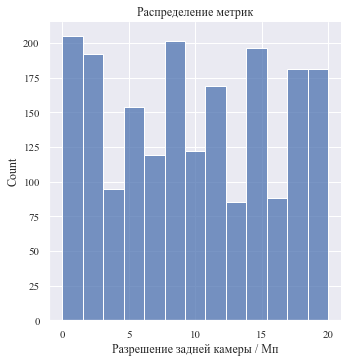

In [93]:
my_basic_research(df = mobile, column = 'Разрешение задней камеры / Мп') 
# Чем меньше "Разрешение задней камеры", тем выше представленность в выборке.

Text(0.5, 1.0, 'Разрешение задней камеры')

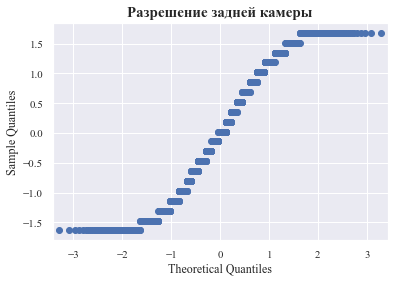

In [94]:
sm.qqplot(mobile['Разрешение задней камеры / Мп'], fit = True)
plt.title('Разрешение задней камеры', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

Text(0.5, 1.0, 'Разрешение задней камеры')

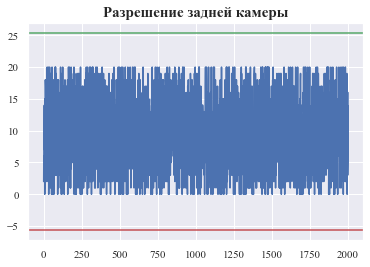

In [95]:
def my_norm_confidence(df = mobile, column = 'Разрешение задней камеры / Мп', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

confidence = my_norm_confidence()

mobile['Разрешение задней камеры / Мп'].plot()
plt.axhline(y = confidence[1], color = 'g', linestyle = '-')
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
plt.title('Разрешение задней камеры', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Доверительный интервал позволяет говорить об отсутствии выбросов.

In [96]:
mobile['Z_score'] = scipy.stats.zscore(mobile['Разрешение задней камеры / Мп'])
mobile[(mobile['Z_score'] < -3) | (mobile['Z_score'] > 3)]
# Z-оценка подтверждает отсутствие выбросов.

,Мощность аккумулятора / мАч,Bluetooth,Скорость процессора,Две сим-карты,Разрешение фронтальной камеры / Мп,4G подключение,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,...,3G подключение,Сенсорный экран,Wi-Fi,Ценовая категория,Мощность_аккумулятора_cat,Скорость_процессора_cat,Разрешение_фронтальной_камеры_cat,Внутренняя_память_cat,Толщина_cat,Z_score


In [97]:
mobile_omem = mobile['Оперативная память / Мб'].max() - mobile['Оперативная память / Мб'].min() # размах 
mobile_omem_iqr = np.percentile(mobile['Оперативная память / Мб'], 75) - np.percentile(mobile['Оперативная память / Мб'], 25)
# интерквартильный размах
# В данных возможно присутсвтуют аномальные значения, так как размах и интерквартильный размах отличаются приблизительно в 2 раза.

mobile_omem_var = mobile['Оперативная память / Мб'].var() #дисперсия 
mobile_omem_std = mobile['Оперативная память / Мб'].std() # среднеквадратичное отклонение
# Следовательно, отклонение значений от среднего находится в диапазоне +-1085.

display(mobile_omem, mobile_omem_iqr, mobile_omem_var, mobile_omem_std) 

3742.0

1855.75

1175459.9804250777

1084.1863218216129

In [98]:
def my_norm_confidence(df = mobile, column = 'Оперативная память / Мб', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

Базовые метрики:  
count    1988.000000
mean     2126.544266
std      1084.186322
min       256.000000
25%      1210.750000
50%      2147.500000
75%      3066.500000
max      3998.000000
Name: Оперативная память / Мб, dtype: float64
-----------------
Самые популярные метрики, топ 5
1229.0    4
1464.0    4
2610.0    4
3142.0    4
2227.0    4
Name: Оперативная память / Мб, dtype: int64
-----------------
КЭ -1.1885351920795797
КА 0.004277403716620683


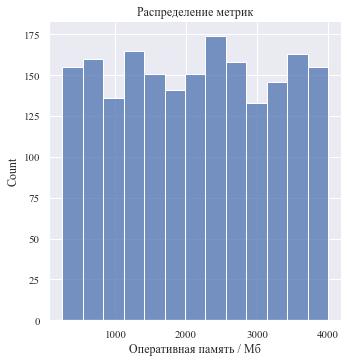

In [99]:
my_basic_research(df = mobile, column = 'Оперативная память / Мб') 
# Размер оперативной памяти, наиболее представленный в выборке, составляет 1464, 3142, 2610, 2227 и 1229.

Text(0.5, 1.0, 'Оперативная память')

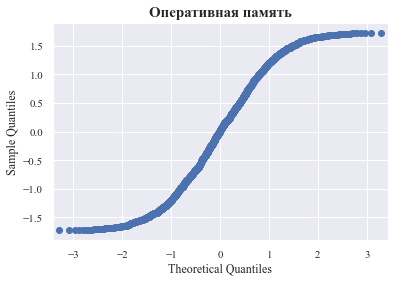

In [100]:
sm.qqplot(mobile['Оперативная память / Мб'], fit = True)
plt.title('Оперативная память', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

Text(0.5, 1.0, 'Оперативная память')

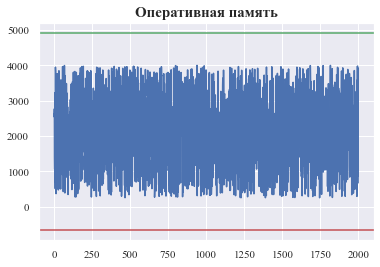

In [101]:
def my_norm_confidence(df = mobile, column = 'Оперативная память / Мб', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

confidence = my_norm_confidence()

mobile['Оперативная память / Мб'].plot()
plt.axhline(y = confidence[1], color = 'g', linestyle = '-')
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
plt.title('Оперативная память', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Доверительный интервал позволяет говорить об отсутствии выбросов.

In [102]:
mobile['Z_score'] = scipy.stats.zscore(mobile['Оперативная память / Мб'])
mobile[(mobile['Z_score'] < -3) | (mobile['Z_score'] > 3)]
# Z-оценка подтверждает отсутствие выбросов.

,Мощность аккумулятора / мАч,Bluetooth,Скорость процессора,Две сим-карты,Разрешение фронтальной камеры / Мп,4G подключение,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,...,3G подключение,Сенсорный экран,Wi-Fi,Ценовая категория,Мощность_аккумулятора_cat,Скорость_процессора_cat,Разрешение_фронтальной_камеры_cat,Внутренняя_память_cat,Толщина_cat,Z_score


In [103]:
mobile_sheight = mobile['Высота / Cм'].max() - mobile['Высота / Cм'].min() # размах 
mobile_sheight_iqr = np.percentile(mobile['Высота / Cм'], 75) - np.percentile(mobile['Высота / Cм'], 25)
# интерквартильный размах
# В данных возможно присутсвтуют аномальные значения, так как размах и интерквартильный размах отличаются в 2 раза.

mobile_sheight_var = mobile['Высота / Cм'].var() #дисперсия 
mobile_sheight_std = mobile['Высота / Cм'].std() #среднеквадратичное отклонение
# Следовательно, отклонение значений от среднего находится в диапазоне +-4.

display(mobile_sheight, mobile_sheight_iqr, mobile_sheight_var, mobile_sheight_std)

14.0

7.0

17.77150547978351

4.215626344896273

In [104]:
def my_norm_confidence(df = mobile, column = 'Высота / Cм', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

Базовые метрики:  
count    1988.000000
mean       12.308350
std         4.215626
min         5.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        19.000000
Name: Высота / Cм, dtype: float64
-----------------
Самые популярные метрики, топ 5
17.0    193
12.0    157
7.0     151
14.0    142
16.0    140
Name: Высота / Cм, dtype: int64
-----------------
КЭ -1.1900842154112716
КА -0.09981303862071733


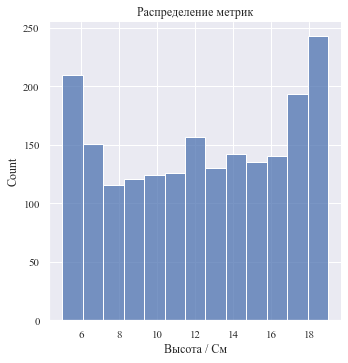

In [105]:
my_basic_research(df = mobile, column = 'Высота / Cм') 
# Высота, наиболее представленная в выборке, составляет 17, 12 и 7 см.

Text(0.5, 1.0, 'Высота')

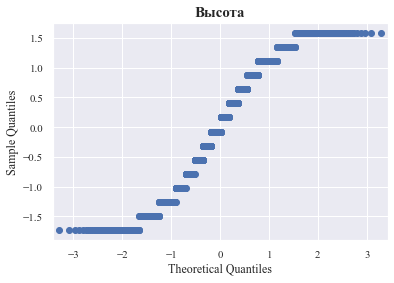

In [106]:
sm.qqplot(mobile['Высота / Cм'], fit = True)
plt.title('Высота', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

Text(0.5, 1.0, 'Высота')

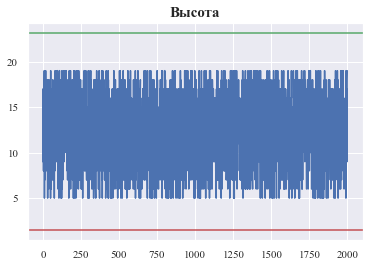

In [107]:
def my_norm_confidence(df = mobile, column = 'Высота / Cм', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

confidence = my_norm_confidence()

mobile['Высота / Cм'].plot()
plt.axhline(y = confidence[1], color = 'g', linestyle = '-')
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
plt.title('Высота', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Доверительный интервал позволяет говорить об отсутствии выбросов.

In [108]:
mobile['Z_score'] = scipy.stats.zscore(mobile['Высота / Cм'])
mobile[(mobile['Z_score'] < -3) | (mobile['Z_score'] > 3)]
# Z-оценка подтверждает отсутствие выбросов.

,Мощность аккумулятора / мАч,Bluetooth,Скорость процессора,Две сим-карты,Разрешение фронтальной камеры / Мп,4G подключение,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,...,3G подключение,Сенсорный экран,Wi-Fi,Ценовая категория,Мощность_аккумулятора_cat,Скорость_процессора_cat,Разрешение_фронтальной_камеры_cat,Внутренняя_память_cat,Толщина_cat,Z_score


In [109]:
mobile_swidth = mobile['Ширина / Cм'].max() - mobile['Ширина / Cм'].min() # размах 
mobile_swidth_iqr = np.percentile(mobile['Ширина / Cм'], 75) - np.percentile(mobile['Ширина / Cм'], 25)
# интерквартильный размах
# В данных возможно присутсвтуют аномальные значения, так как размах и интерквартильный размах отличаются приблизительно в 2,7 раза.

mobile_swidth_var = mobile['Ширина / Cм'].var() # дисперсия 
mobile_swidth_std = mobile['Ширина / Cм'].std() # среднеквадратичное отклонение
# Следовательно, отклонение значений от среднего находится в диапазоне +-4.

display(mobile_swidth, mobile_swidth_iqr, mobile_swidth_var, mobile_swidth_std) 

18.0

7.0

19.021801670617467

4.36139904968778

In [110]:
def my_norm_confidence(df = mobile, column = 'Ширина / Cм', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

Базовые метрики:  
count    1988.000000
mean        5.771630
std         4.361399
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: Ширина / Cм, dtype: float64
-----------------
Самые популярные метрики, топ 5
1.0    210
3.0    198
0.0    180
4.0    179
5.0    158
Name: Ширина / Cм, dtype: int64
-----------------
КЭ -0.39630219215263507
КА 0.6298071463211273


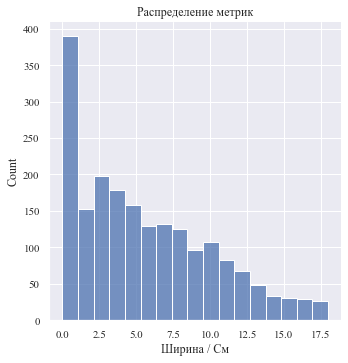

In [111]:
my_basic_research(df = mobile, column = 'Ширина / Cм') 
# В Топ-3 метрики "Ширины" входят 1, 3, 0.
# Чем меньше "Ширина", тем выше частота её представленности в выборке.

Text(0.5, 1.0, 'Ширина')

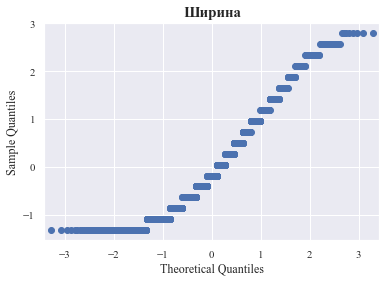

In [112]:
sm.qqplot(mobile['Ширина / Cм'], fit = True)
plt.title('Ширина', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

Text(0.5, 1.0, 'Ширина')

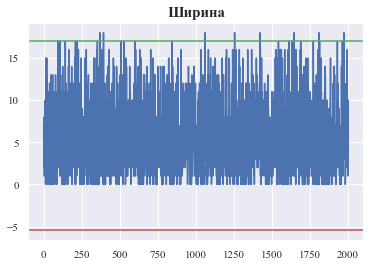

In [113]:
def my_norm_confidence(df = mobile, column = 'Ширина / Cм', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

confidence = my_norm_confidence()

mobile['Ширина / Cм'].plot()
plt.axhline(y = confidence[1], color = 'g', linestyle = '-')
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
plt.title('Ширина', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Доверительный интервал позволяет говорить об отсутствии выбросов.

In [114]:
mobile['Z_score'] = scipy.stats.zscore(mobile['Ширина / Cм'])
mobile[(mobile['Z_score'] < -3) | (mobile['Z_score'] > 3)]
# Z-оценка подтверждает отсутствие выбросов.

,Мощность аккумулятора / мАч,Bluetooth,Скорость процессора,Две сим-карты,Разрешение фронтальной камеры / Мп,4G подключение,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,...,3G подключение,Сенсорный экран,Wi-Fi,Ценовая категория,Мощность_аккумулятора_cat,Скорость_процессора_cat,Разрешение_фронтальной_камеры_cat,Внутренняя_память_cat,Толщина_cat,Z_score


In [115]:
mobile_time = mobile['Время беспрерывной работы / Ч'].max() - mobile['Время беспрерывной работы / Ч'].min() # размах 
mobile_time_iqr = np.percentile(mobile['Время беспрерывной работы / Ч'], 75) - np.percentile(mobile['Время беспрерывной работы / Ч'], 25)
# интерквартильный размах
# В данных возможно присутсвтуют аномальные значения, так как размах и интерквартильный размах отличаются приблизительно в 1,8 раза.

mobile_time_var = mobile['Время беспрерывной работы / Ч'].var() # дисперсия 
mobile_time_std = mobile['Время беспрерывной работы / Ч'].std() # среднеквадратичное отклонение
# Следовательно, отклонение значений от среднего находится в диапазоне +-5.

display(mobile_time, mobile_time_iqr, mobile_time_var, mobile_time_std) 

18.0

10.0

29.805021118153164

5.459397505050641

In [116]:
def my_norm_confidence(df = mobile, column = 'Время беспрерывной работы / Ч', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

Базовые метрики:  
count    1988.000000
mean       11.014588
std         5.459398
min         2.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        20.000000
Name: Время беспрерывной работы / Ч, dtype: float64
-----------------
Самые популярные метрики, топ 5
7.0     122
4.0     122
16.0    115
15.0    115
19.0    113
Name: Время беспрерывной работы / Ч, dtype: int64
-----------------
КЭ -1.2177557222642297
КА 0.008944675448687475


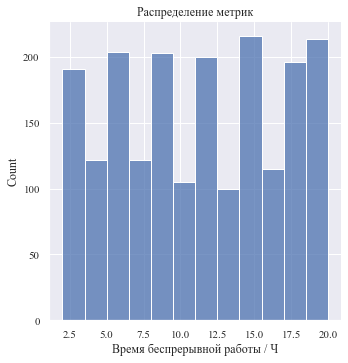

In [117]:
my_basic_research(df = mobile, column = 'Время беспрерывной работы / Ч') 
# Время беспрерывной работы, наиболее представленное в выборке, составляет 7, 4 и 16 часов.

Text(0.5, 1.0, 'Время беспрерывной работы')

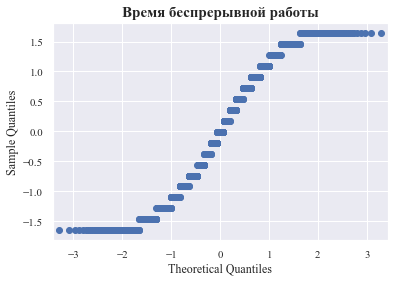

In [118]:
sm.qqplot(mobile['Время беспрерывной работы / Ч'], fit = True)
plt.title('Время беспрерывной работы', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)

Text(0.5, 1.0, 'Время беспрерывной работы')

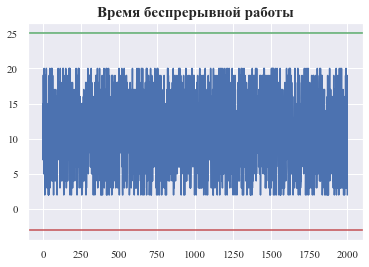

In [119]:
def my_norm_confidence(df = mobile, column = 'Время беспрерывной работы / Ч', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

confidence = my_norm_confidence()

mobile['Время беспрерывной работы / Ч'].plot()
plt.axhline(y = confidence[1], color = 'g', linestyle = '-')
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
plt.title('Время беспрерывной работы', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
# Доверительный интервал позволяет говорить об отсутствии выбросов.

In [120]:
mobile['Z_score'] = scipy.stats.zscore(mobile['Время беспрерывной работы / Ч'])
mobile[(mobile['Z_score'] < -3) | (mobile['Z_score'] > 3)]
# Z-оценка подтверждает отсутствие выбросов.

,Мощность аккумулятора / мАч,Bluetooth,Скорость процессора,Две сим-карты,Разрешение фронтальной камеры / Мп,4G подключение,Внутренняя память / Гб,Толщина / См,Вес / Гр,Кол-во ядер в процессоре,...,3G подключение,Сенсорный экран,Wi-Fi,Ценовая категория,Мощность_аккумулятора_cat,Скорость_процессора_cat,Разрешение_фронтальной_камеры_cat,Внутренняя_память_cat,Толщина_cat,Z_score


## <font color = purple> Корреляция

**В рамках работы был проведён подробный корреляционный анализ технических характеристик между собой и с ценовой категорией с целью написания кода для прогнозирования цены телефона при наличии информации о всех или части технических характеристик новинки.**

In [121]:
mobile_cor = mobile.drop(['Bluetooth', 'Две сим-карты', '4G подключение', '3G подключение',\
                          'Сенсорный экран', 'Wi-Fi', 'Z_score', 'Мощность_аккумулятора_cat', 'Скорость_процессора_cat',\
                          'Разрешение_фронтальной_камеры_cat', 'Внутренняя_память_cat', 'Толщина_cat'], axis = 1) 
# исключение из таблицы не числовых данных формата integer

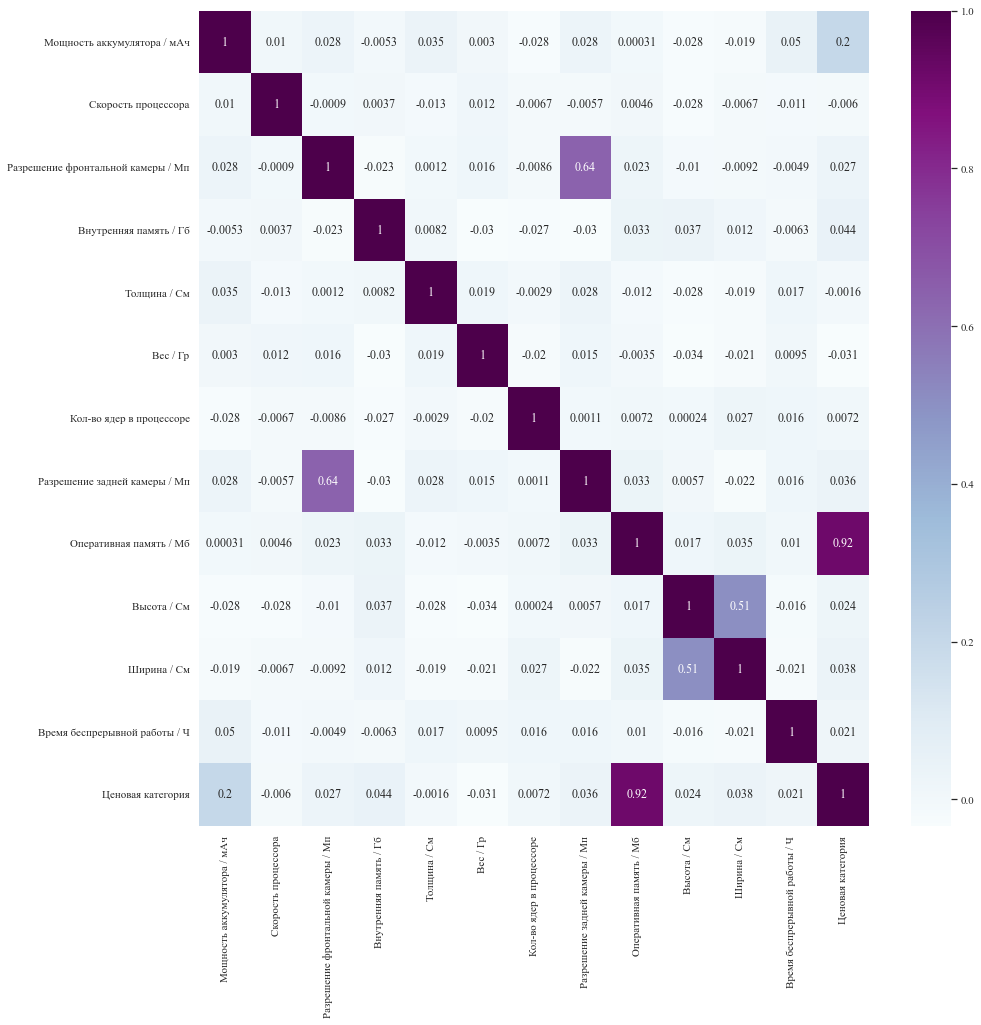

In [122]:
plt.figure(figsize=(15,15))
sns.heatmap(mobile_cor.corr(),annot=True,cmap='BuPu')
plt.show()
# демонстрация коэффициента корреляции между числовыми переменными

In [123]:
mobile_cor.corr()['Ценовая категория'].sort_values()
# "Ценовая категория" демонстрирует наибольший положительный коэффициент корреляци
# с показателями "Оперативная память" и "Мощность аккумулятора".
# В Топ-4 по коэффициенту корреляции с ценовой категорией также вошли "Внутренняя память" и "Ширина".
# Далее проверим корреляцию посредством постороения диаграмм.

Вес / Гр                             -0.031180
Скорость процессора                  -0.006042
Толщина / См                         -0.001570
Кол-во ядер в процессоре              0.007159
Время беспрерывной работы / Ч         0.020810
Высота / Cм                           0.024294
Разрешение фронтальной камеры / Мп    0.027334
Разрешение задней камеры / Мп         0.036343
Ширина / Cм                           0.037836
Внутренняя память / Гб                0.044144
Мощность аккумулятора / мАч           0.201768
Оперативная память / Мб               0.916742
Ценовая категория                     1.000000
Name: Ценовая категория, dtype: float64

In [124]:
price = mobile_cor.groupby(mobile['Ценовая категория'])['Ценовая категория'].mean()
memory = mobile_cor.groupby(mobile['Ценовая категория'])['Оперативная память / Мб'].mean()
power = mobile_cor.groupby(mobile['Ценовая категория'])['Мощность аккумулятора / мАч'].mean()
int_memory = mobile_cor.groupby(mobile['Ценовая категория'])['Внутренняя память / Гб'].mean()
width = mobile_cor.groupby(mobile['Ценовая категория'])['Ширина / Cм'].mean()

In [125]:
mobile_price = pd.concat([price, memory, power, int_memory, width], axis = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


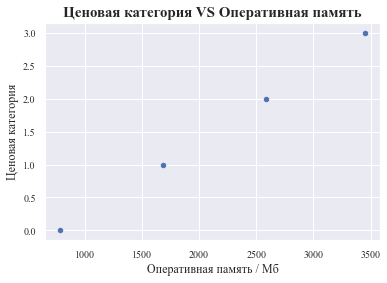

In [126]:
mobile_price.plot('Оперативная память / Мб', 'Ценовая категория', kind = 'scatter') 
plt.title('Ценовая категория VS Оперативная память', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма демонстрирует положительную линейную взаимосвязь "Ценовой категории" мобильного телефона
# и размера "Оперативной памяти".

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


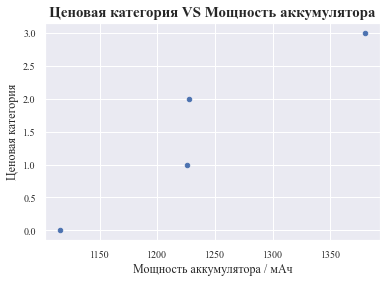

In [127]:
mobile_price.plot('Мощность аккумулятора / мАч', 'Ценовая категория', kind = 'scatter')
plt.title('Ценовая категория VS Мощность аккумулятора', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма демонстрирует пололожительную линейную взаимосвязь "Ценовой категории" мобильного телефона и "Мощности аккумлятора".

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


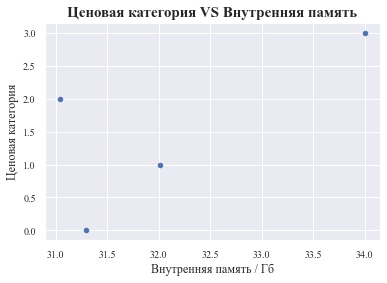

In [128]:
mobile_price.plot('Внутренняя память / Гб', 'Ценовая категория', kind = 'scatter') 
plt.title('Ценовая категория VS Внутренняя память', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма демонстрирует положительную линейную взаимосвязь "Ценовой категории" мобильного телефона и "Внутренней памяти".
# При этом ценовая категория со значением 2 демонстрирует отклонение.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


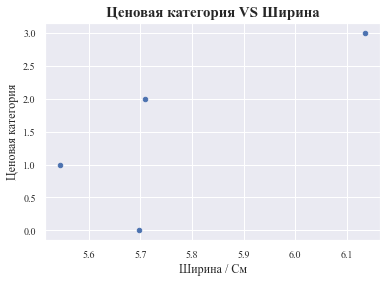

In [129]:
mobile_price.plot('Ширина / Cм', 'Ценовая категория', kind = 'scatter') 
plt.title('Ценовая категория VS Ширина', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма не демонстрирует линейную взаимосвязь "Ценовой категории" мобильного телефона и "Ширины".

In [130]:
mobile_cor.corr()['Мощность аккумулятора / мАч'].sort_values()
# "Мощность аккумулятора" демонстрирует наибольший положительный коэффициент корреляции с "Ценовой категорией".
# Диаграмма построена ранее.
# Также "Мощность аккумулятора" имеет положительный коэффициент корреляции с "Временем беспрерывной работы" и "Толщиной".
#Далее проверим корреляцию посредством постороения диаграмм.

Кол-во ядер в процессоре             -0.028340
Высота / Cм                          -0.027840
Ширина / Cм                          -0.018824
Внутренняя память / Гб               -0.005253
Оперативная память / Мб               0.000309
Вес / Гр                              0.003008
Скорость процессора                   0.010400
Разрешение фронтальной камеры / Мп    0.027604
Разрешение задней камеры / Мп         0.028378
Толщина / См                          0.035126
Время беспрерывной работы / Ч         0.050307
Ценовая категория                     0.201768
Мощность аккумулятора / мАч           1.000000
Name: Мощность аккумулятора / мАч, dtype: float64

In [131]:
power = mobile_cor.groupby(mobile['Мощность аккумулятора / мАч'])['Мощность аккумулятора / мАч'].mean()
memory = mobile_cor.groupby(mobile['Мощность аккумулятора / мАч'])['Время беспрерывной работы / Ч'].mean()
width = mobile_cor.groupby(mobile['Мощность аккумулятора / мАч'])['Толщина / См'].mean()

In [132]:
mobile_power = pd.concat([power, memory, width], axis = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


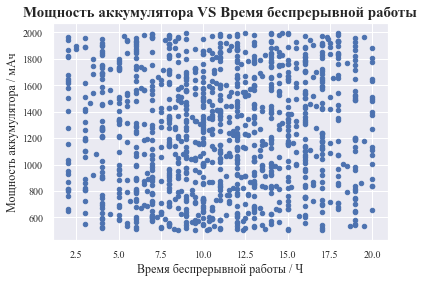

In [133]:
mobile_power.plot('Время беспрерывной работы / Ч', 'Мощность аккумулятора / мАч', kind = 'scatter') 
plt.title('Мощность аккумулятора VS Время беспрерывной работы', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма не демонстрирует явную линейную взаимосвязь "Мощности аккумулятора" и "Времени беспрерывной работы".

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


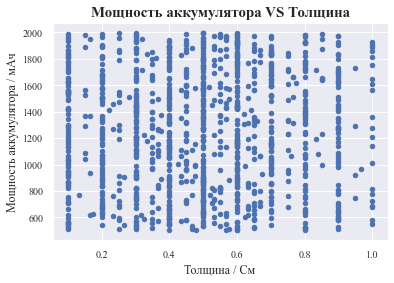

In [134]:
mobile_power.plot('Толщина / См', 'Мощность аккумулятора / мАч', kind = 'scatter') 
plt.title('Мощность аккумулятора VS Толщина', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма не демонстрирует явную линейную взаимосвязь "Мощности аккумулятора" и Толщины".

In [135]:
mobile_cor.corr()['Скорость процессора'].sort_values()
# "Скорость процессора" показывает наибольший отрицательный коэффициент корреляции с показателем "Высоты".
# Далее проверим корреляцию посредством постороения диаграмм.

Высота / Cм                          -0.028028
Толщина / См                         -0.012685
Время беспрерывной работы / Ч        -0.010523
Ширина / Cм                          -0.006675
Кол-во ядер в процессоре             -0.006663
Ценовая категория                    -0.006042
Разрешение задней камеры / Мп        -0.005743
Разрешение фронтальной камеры / Мп   -0.000899
Внутренняя память / Гб                0.003663
Оперативная память / Мб               0.004615
Мощность аккумулятора / мАч           0.010400
Вес / Гр                              0.012437
Скорость процессора                   1.000000
Name: Скорость процессора, dtype: float64

In [136]:
speed = mobile_cor.groupby(mobile['Скорость процессора'])['Скорость процессора'].mean()
height = mobile_cor.groupby(mobile['Скорость процессора'])['Высота / Cм'].mean()

In [137]:
mobile_speed = pd.concat([speed, height], axis = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


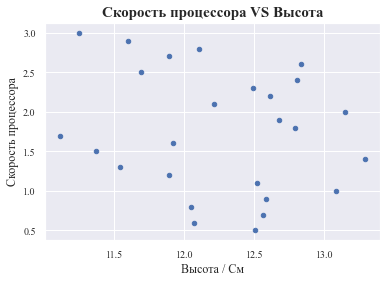

In [138]:
mobile_speed.plot('Высота / Cм', 'Скорость процессора', kind = 'scatter') 
plt.title('Скорость процессора VS Высота', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма подтверждает наличие негативной линейной взаимосвязи "Скорости процессора" и "Высоты".

In [139]:
mobile_cor.corr()['Разрешение фронтальной камеры / Мп'].sort_values()
# "Разрешение фронтальной камеры" показывает наибольший положительный коэффициент корреляции 
# с показателем "Разрешение задней камеры".
# Также "Разрешение фронтальной камеры" коррелирует с "Мощностью аккумулятора".
# Далее проверим корреляцию посредством постороения диаграммы.

Внутренняя память / Гб               -0.022539
Высота / Cм                          -0.010064
Ширина / Cм                          -0.009221
Кол-во ядер в процессоре             -0.008586
Время беспрерывной работы / Ч        -0.004862
Скорость процессора                  -0.000899
Толщина / См                          0.001197
Вес / Гр                              0.016304
Оперативная память / Мб               0.022794
Ценовая категория                     0.027334
Мощность аккумулятора / мАч           0.027604
Разрешение задней камеры / Мп         0.638544
Разрешение фронтальной камеры / Мп    1.000000
Name: Разрешение фронтальной камеры / Мп, dtype: float64

In [140]:
resolution_f = mobile_cor.groupby(mobile['Разрешение фронтальной камеры / Мп'])['Разрешение фронтальной камеры / Мп'].mean()
resolution_b = mobile_cor.groupby(mobile['Разрешение фронтальной камеры / Мп'])['Разрешение задней камеры / Мп'].mean()
power = mobile_cor.groupby(mobile['Разрешение фронтальной камеры / Мп'])['Мощность аккумулятора / мАч'].mean()

In [141]:
mobile_resolution_f = pd.concat([resolution_f, resolution_b, power], axis = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


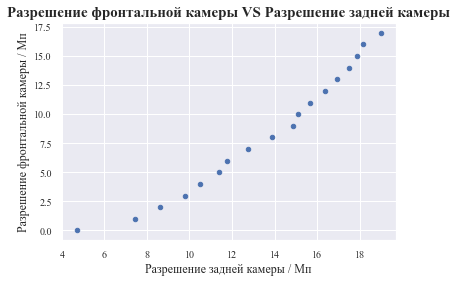

In [142]:
mobile_resolution_f.plot('Разрешение задней камеры / Мп', 'Разрешение фронтальной камеры / Мп', kind = 'scatter') 
plt.title('Разрешение фронтальной камеры VS Разрешение задней камеры', font = 'Times New Roman', fontweight = 'bold',\
          fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма подтверждает позитивную линейную взаимосвязь "Разрешения фронтальной камеры" и "Разрешения задней камеры".

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


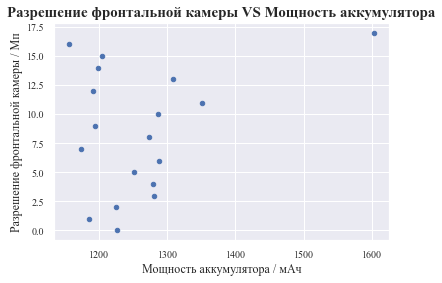

In [143]:
mobile_resolution_f.plot('Мощность аккумулятора / мАч', 'Разрешение фронтальной камеры / Мп', kind = 'scatter') 
plt.title('Разрешение фронтальной камеры VS Мощность аккумулятора', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма подтверждает позитивную линейную взаимосвязь "Разрешения фронтальной камеры" и "Мощности аккумулятора".

In [144]:
mobile_cor.corr()['Внутренняя память / Гб'].sort_values()
# "Внутренняя память" показывает наибольший положительный коэффициент корреляции с показателями "Ценовая категория" и "Высота". 
# Корреляцию "Внутренней памяти" и "Ценовой категории" анализировали ранее.
# Также "Внутренняя память" показывает наибольший отрицательный коэффициент корреляции с показателем "Вес". 
# Далее проверим корреляцию посредством постороения диаграмм.

Вес / Гр                             -0.030240
Разрешение задней камеры / Мп        -0.029971
Кол-во ядер в процессоре             -0.026814
Разрешение фронтальной камеры / Мп   -0.022539
Время беспрерывной работы / Ч        -0.006293
Мощность аккумулятора / мАч          -0.005253
Скорость процессора                   0.003663
Толщина / См                          0.008233
Ширина / Cм                           0.011632
Оперативная память / Мб               0.033137
Высота / Cм                           0.037217
Ценовая категория                     0.044144
Внутренняя память / Гб                1.000000
Name: Внутренняя память / Гб, dtype: float64

In [145]:
memory = mobile_cor.groupby(mobile['Внутренняя память / Гб'])['Внутренняя память / Гб'].mean()
height = mobile_cor.groupby(mobile['Внутренняя память / Гб'])['Высота / Cм'].mean()
weight = mobile_cor.groupby(mobile['Внутренняя память / Гб'])['Вес / Гр'].mean()

In [146]:
mobile_memory = pd.concat([memory, height, weight], axis = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


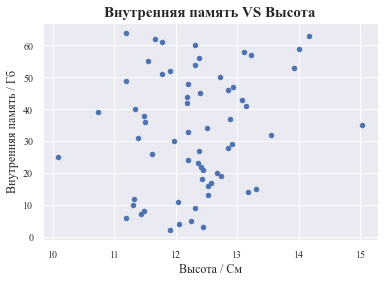

In [147]:
mobile_memory.plot('Высота / Cм', 'Внутренняя память / Гб', kind = 'scatter') 
plt.title('Внутренняя память VS Высота', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма не демонстрирует линейную взаимосвязь "Внутренней памяти" и "Высоты".

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


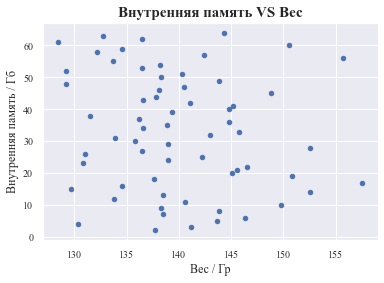

In [148]:
mobile_memory.plot('Вес / Гр', 'Внутренняя память / Гб', kind = 'scatter') 
plt.title('Внутренняя память VS Вес', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма не демонстрирует линейную взаимосвязь "Внутренней памяти" и "Веса".

In [149]:
mobile_cor.corr()['Вес / Гр'].sort_values()
# "Веc" показывает наибольший отрицательный коэффициент корреляции с показателями "Высота", 
# "Ценовая категория" "Внутренняя память".
# Корреляцию "Веса" и "Внутренней памяти" анализировали ранее.
# Далее проверим корреляцию посредством постороения диаграммы.

Высота / Cм                          -0.033767
Ценовая категория                    -0.031180
Внутренняя память / Гб               -0.030240
Ширина / Cм                          -0.020946
Кол-во ядер в процессоре             -0.020138
Оперативная память / Мб              -0.003478
Мощность аккумулятора / мАч           0.003008
Время беспрерывной работы / Ч         0.009459
Скорость процессора                   0.012437
Разрешение задней камеры / Мп         0.014931
Разрешение фронтальной камеры / Мп    0.016304
Толщина / См                          0.018581
Вес / Гр                              1.000000
Name: Вес / Гр, dtype: float64

In [150]:
weight = mobile_cor.groupby(mobile['Вес / Гр'])['Вес / Гр'].mean()
price = mobile_cor.groupby(mobile['Вес / Гр'])['Ценовая категория'].mean()
height = mobile_cor.groupby(mobile['Вес / Гр'])['Высота / Cм'].mean()

In [151]:
mobile_weight = pd.concat([weight, price, height], axis = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


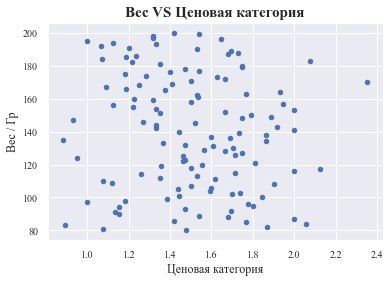

In [152]:
mobile_weight.plot('Ценовая категория', 'Вес / Гр', kind = 'scatter') 
plt.title('Вес VS Ценовая категория', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
#Диаграмма демонстрирует отрицательную линейную взаимосвязь "Веса" и "Ценовой категории".

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


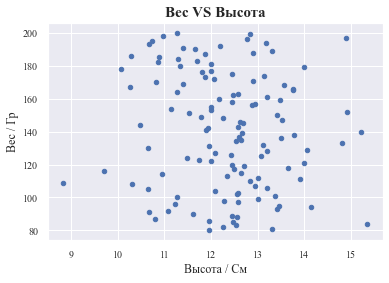

In [153]:
mobile_weight.plot('Высота / Cм', 'Вес / Гр', kind = 'scatter') 
plt.title('Вес VS Высота', font = 'Times New Roman', fontweight = 'bold', fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
#Диаграмма не демонстрирует линейную взаимосвязь "Веса" и "Высоты".

In [154]:
mobile_cor.corr()['Кол-во ядер в процессоре'].sort_values()
# "Кол-во ядер в процессоре" показывает наибольший отрицательный коэффициент корреляции с показателем "Мощность аккумулятора". 
# Далее проверим корреляцию посредством постороения диаграммы.

Мощность аккумулятора / мАч          -0.028340
Внутренняя память / Гб               -0.026814
Вес / Гр                             -0.020138
Разрешение фронтальной камеры / Мп   -0.008586
Скорость процессора                  -0.006663
Толщина / См                         -0.002893
Высота / Cм                           0.000245
Разрешение задней камеры / Мп         0.001122
Ценовая категория                     0.007159
Оперативная память / Мб               0.007212
Время беспрерывной работы / Ч         0.015812
Ширина / Cм                           0.026503
Кол-во ядер в процессоре              1.000000
Name: Кол-во ядер в процессоре, dtype: float64

In [155]:
core = mobile_cor.groupby(mobile['Кол-во ядер в процессоре'])['Кол-во ядер в процессоре'].mean()
power = mobile_cor.groupby(mobile['Кол-во ядер в процессоре'])['Мощность аккумулятора / мАч'].mean()

In [156]:
mobile_core = pd.concat([core, power], axis = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


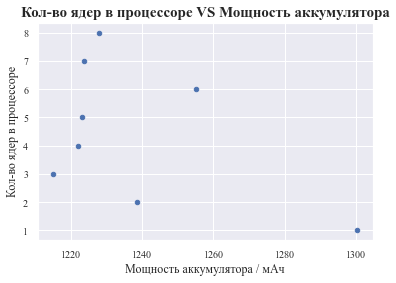

In [157]:
mobile_core.plot('Мощность аккумулятора / мАч', 'Кол-во ядер в процессоре', kind = 'scatter') 
plt.title('Кол-во ядер в процессоре VS Мощность аккумулятора', font = 'Times New Roman', fontweight = 'bold', \
          fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма демонстрирует линейную отрицательную взаимосвязь "Кол-ва ядер в процессоре" и "Мощности аккумулятора".

In [158]:
mobile_cor.corr()['Разрешение задней камеры / Мп'].sort_values()
# "Разрешение задней камеры" показывает наибольший положительный коэффициент корреляции с показателями 
# "Разрешение фронтальной камеры", "Ценовая категория" и "Оперативная память". 
# Корреляция разрешений задней и фронтальной камер были рассмотрены ранее.
# Далее проверим корреляцию посредством постороения диаграммы.

Внутренняя память / Гб               -0.029971
Ширина / Cм                          -0.022281
Скорость процессора                  -0.005743
Кол-во ядер в процессоре              0.001122
Высота / Cм                           0.005696
Вес / Гр                              0.014931
Время беспрерывной работы / Ч         0.016176
Толщина / См                          0.028148
Мощность аккумулятора / мАч           0.028378
Оперативная память / Мб               0.033000
Ценовая категория                     0.036343
Разрешение фронтальной камеры / Мп    0.638544
Разрешение задней камеры / Мп         1.000000
Name: Разрешение задней камеры / Мп, dtype: float64

In [159]:
resolution = mobile_cor.groupby(mobile['Разрешение задней камеры / Мп'])['Разрешение задней камеры / Мп'].mean()
price = mobile_cor.groupby(mobile['Разрешение задней камеры / Мп'])['Ценовая категория'].mean()
memory = mobile_cor.groupby(mobile['Разрешение задней камеры / Мп'])['Оперативная память / Мб'].mean()

In [160]:
mobile_resolution = pd.concat([resolution, price, memory], axis = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


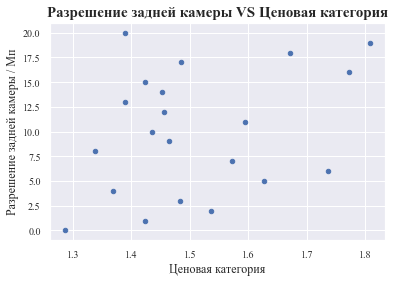

In [161]:
mobile_resolution.plot('Ценовая категория', 'Разрешение задней камеры / Мп', kind = 'scatter') 
plt.title('Разрешение задней камеры VS Ценовая категория', font = 'Times New Roman', fontweight = 'bold', \
          fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма демонстрирует положительную линейную взаимосвязь "Разрешения задней камеры" и "Ценовой категории".

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


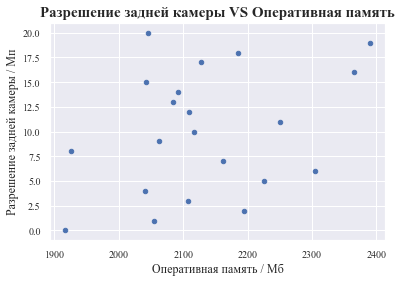

In [162]:
mobile_resolution.plot('Оперативная память / Мб', 'Разрешение задней камеры / Мп', kind = 'scatter') 
plt.title('Разрешение задней камеры VS Оперативная память', font = 'Times New Roman', fontweight = 'bold', \
          fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма демонстрирует позитивную линейную взаимосвязь "Разрешения задней камеры" и "Оперативной памяти".

In [163]:
mobile_cor.corr()['Оперативная память / Мб'].sort_values()
# "Оперативная память" показывает наибольший положительный коэффициент корреляции с показателями 
# "Ценовой категории" и "Ширины". 
# Корреляция "Оперативной памяти" и "Ценовой категории" была рассмотрена ранее.
# Далее проверим корреляцию посредством постороения диаграммы.

Толщина / См                         -0.012161
Вес / Гр                             -0.003478
Мощность аккумулятора / мАч           0.000309
Скорость процессора                   0.004615
Кол-во ядер в процессоре              0.007212
Время беспрерывной работы / Ч         0.010175
Высота / Cм                           0.017279
Разрешение фронтальной камеры / Мп    0.022794
Разрешение задней камеры / Мп         0.033000
Внутренняя память / Гб                0.033137
Ширина / Cм                           0.034523
Ценовая категория                     0.916742
Оперативная память / Мб               1.000000
Name: Оперативная память / Мб, dtype: float64

In [164]:
memory = mobile_cor.groupby(mobile['Оперативная память / Мб'])['Оперативная память / Мб'].mean()
price = mobile_cor.groupby(mobile['Оперативная память / Мб'])['Ширина / Cм'].mean()

In [165]:
mobile_memory = pd.concat([price, memory], axis = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


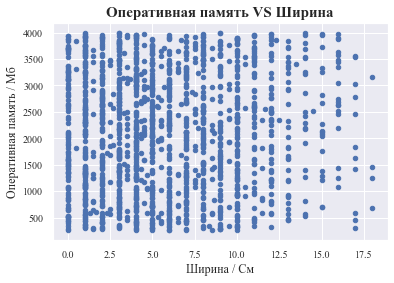

In [166]:
mobile_memory.plot('Ширина / Cм', 'Оперативная память / Мб', kind = 'scatter') 
plt.title('Оперативная память VS Ширина', font = 'Times New Roman', fontweight = 'bold', \
          fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма демонстрирует положительную линейную взаимосвязь "Оперативной памяти" и "Ширины".

In [167]:
mobile_cor.corr()['Высота / Cм'].sort_values()
# "Высота" показывает наибольший положительный коэффициент корреляции с показателем "Ширины".
# Далее проверим корреляцию посредством постороения диаграммы.

Вес / Гр                             -0.033767
Скорость процессора                  -0.028028
Мощность аккумулятора / мАч          -0.027840
Толщина / См                         -0.027538
Время беспрерывной работы / Ч        -0.015962
Разрешение фронтальной камеры / Мп   -0.010064
Кол-во ядер в процессоре              0.000245
Разрешение задней камеры / Мп         0.005696
Оперативная память / Мб               0.017279
Ценовая категория                     0.024294
Внутренняя память / Гб                0.037217
Ширина / Cм                           0.506226
Высота / Cм                           1.000000
Name: Высота / Cм, dtype: float64

In [168]:
height = mobile_cor.groupby(mobile['Высота / Cм'])['Высота / Cм'].mean()
width = mobile_cor.groupby(mobile['Высота / Cм'])['Ширина / Cм'].mean()

In [169]:
mobile_height = pd.concat([height, width], axis = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


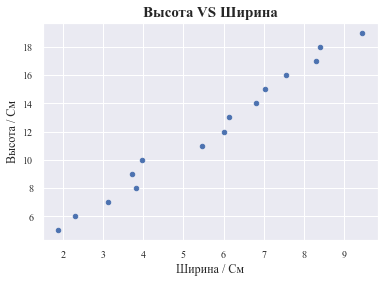

In [170]:
mobile_height.plot('Ширина / Cм', 'Высота / Cм', kind = 'scatter') 
plt.title('Высота VS Ширина', font = 'Times New Roman', fontweight = 'bold', \
          fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма демонстрирует положительную линейную взаимосвязь "Ширины" и "Высоты".

In [171]:
mobile_cor.corr()['Ширина / Cм'].sort_values()
# "Ширина" показывает наибольший положительный коэффициент корреляции с показателями "Высоты" и "Ценовой категории"
# Данные корреляции были рассмотрены ранее.

Разрешение задней камеры / Мп        -0.022281
Время беспрерывной работы / Ч        -0.021187
Вес / Гр                             -0.020946
Толщина / См                         -0.019037
Мощность аккумулятора / мАч          -0.018824
Разрешение фронтальной камеры / Мп   -0.009221
Скорость процессора                  -0.006675
Внутренняя память / Гб                0.011632
Кол-во ядер в процессоре              0.026503
Оперативная память / Мб               0.034523
Ценовая категория                     0.037836
Высота / Cм                           0.506226
Ширина / Cм                           1.000000
Name: Ширина / Cм, dtype: float64

In [172]:
mobile_cor.corr()['Время беспрерывной работы / Ч'].sort_values()
# "Время беспрерывной работы" показывает наибольший положительный коэффициент корреляции с показателем "Мощность аккумулятора".
# Взаимосвязь "Времени беспрерывной работы" и "Мощности аккумулятора" была исследована ранее.
# "Время беспрерывной работы" показывает наибольший отрицательный коэффициент корреляции с показателем "Ширина". 
# Далее проверим корреляцию посредством постороения диаграммы.

Ширина / Cм                          -0.021187
Высота / Cм                          -0.015962
Скорость процессора                  -0.010523
Внутренняя память / Гб               -0.006293
Разрешение фронтальной камеры / Мп   -0.004862
Вес / Гр                              0.009459
Оперативная память / Мб               0.010175
Кол-во ядер в процессоре              0.015812
Разрешение задней камеры / Мп         0.016176
Толщина / См                          0.016984
Ценовая категория                     0.020810
Мощность аккумулятора / мАч           0.050307
Время беспрерывной работы / Ч         1.000000
Name: Время беспрерывной работы / Ч, dtype: float64

In [173]:
time = mobile_cor.groupby(mobile['Время беспрерывной работы / Ч'])['Время беспрерывной работы / Ч'].mean()
width = mobile_cor.groupby(mobile['Время беспрерывной работы / Ч'])['Ширина / Cм'].mean()

In [174]:
mobile_time = pd.concat([time, width], axis = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


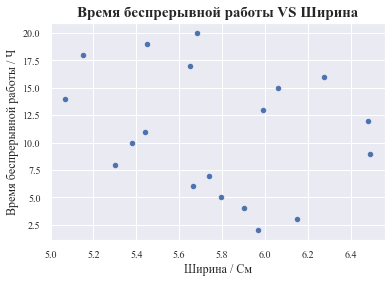

In [175]:
mobile_time.plot('Ширина / Cм', 'Время беспрерывной работы / Ч', kind = 'scatter') 
plt.title('Время беспрерывной работы VS Ширина', font = 'Times New Roman', fontweight = 'bold', \
          fontsize = 15)
plt.tick_params(labelsize = 10)
sns.set(font = 'Times New Roman')
# Диаграмма демонстрирует отрицательную линейную взаимосвязь "Времени беспрерывной работы" и "Ширины".

**Гипотеза о высоком коэффициенте корреляции цены и технических характеристик подтвердилась частично. Ценовая категория демонстрирует положительную линейную взаимосвязь с мощностью аккумулятора, размером оперативной и внутренней памяти.**

### <font color = purple> Вывод

**Таким образом, в данной работе:**
<br>1.Привели таблицу в user-friendly вид
<br>2.Исследовали массив данных на предмет пропущенных значений
<br>3.Привели ряд числовых данных в бинарный и категориальный виды
<br>4.Нашли меры центральных тенденций
<br>5.Использовали инструменты фильтрации и сортировки данных
<br>6.Использовали 2 типа группировок для разных типов данных
<br>7.Исследовали частоту распределния
<br>8.Нашли интерквартильный размах, дисперсию, среднеквадратичное отклонение, доверительный интервал, Z-оценку
<br>9.Идентифицировали строки с аномальными значениями и убрали их
<br>10.Подробно проанализировали корреляцию между показателями посредством диаграммы рассеивания
<br>11.Построили гистаграмму, QQ-plot, столбчатую виды диаграмм, матрицу корреляций
<br>12.Использовали инструменты продвинутой визуализации

</font>

<font color = green> Спасибо за внимание! </font>